# Leopard challenge Classification

## Загрузка данных
Данные беру из leopard-challenge-classification.zip
https://drive.google.com/file/d/1OYjGYeYQzKI3mE02ymtkrbRJb5EurpL7/view?usp=sharing

# Colab

In [1]:
! gdown --id 1OYjGYeYQzKI3mE02ymtkrbRJb5EurpL7

"gdown" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


! unzip /content/leopard-challenge-classification.zip -d /content/leopard-challenge-classification/

In [9]:
! unzip /content/leopard-challenge-classification.zip -d /content/leopard_challenge_classification/

"unzip" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [32]:
import pandas as pd

In [1]:
df = pd.read_csv('/content/leopard_challenge_classification/train.csv')

NameError: name 'pd' is not defined

In [1]:
df.head()

NameError: name 'train' is not defined

In [ ]:
!pip install phik

!pip install feature_engine

!pip install catboost

# Pycharm

In [1]:
from zipfile import ZipFile

with ZipFile('leopard-challenge-classification.zip', 'r') as zf:
    zf.extractall()

# 1. Задача

Дан набор данных с основными клиническими показателями людей.
Каждая строчка в датасете - клинические показатели одного человека - рост, вес, зрение и т.д.
**Задача:** Определить, курит человек или нет, на основании его показателей.

# 2. Импорт библиотек

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
import phik
import folium
from feature_engine.selection import SmartCorrelatedSelection
from feature_engine.imputation import RandomSampleImputer
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, log_loss
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier, Pool, cv
import joblib
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

# plt.style.use('dark_background')
plt.style.use('seaborn-colorblind')
pd.set_option('display.max_columns', 100)

# 3. Загрузка Датасета

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,2791,65,170,75,91.0,0.6,0.9,1.0,1.0,122.0,79.0,107.0,119.0,51.0,71.0,52.0,14.0,3.0,1.2,20.0,16.0,122.0,Y,0,N,0
1,18280,35,170,85,97.0,1.5,1.5,1.0,1.0,138.0,88.0,117.0,204.0,239.0,46.0,120.0,14.6,1.0,0.7,20.0,25.0,40.0,Y,0,Y,1
2,1618,70,165,55,75.0,0.8,1.0,1.0,1.0,115.0,63.0,128.0,165.0,60.0,68.0,85.0,14.7,1.0,0.7,15.0,13.0,19.0,Y,0,Y,0
3,16856,35,180,85,83.0,1.2,1.0,1.0,1.0,130.0,80.0,100.0,209.0,155.0,53.0,125.0,17.2,1.0,0.8,22.0,18.0,17.0,Y,0,Y,0
4,5885,25,170,65,80.0,1.5,1.2,1.0,1.0,135.0,75.0,94.0,153.0,73.0,58.0,80.0,16.5,1.0,1.0,20.0,13.0,14.0,Y,0,Y,1


In [5]:
df.shape

(13863, 26)

In [6]:
df_test = pd.read_csv('test.csv')

In [7]:
df.head()

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,2791,65,170,75,91.0,0.6,0.9,1.0,1.0,122.0,79.0,107.0,119.0,51.0,71.0,52.0,14.0,3.0,1.2,20.0,16.0,122.0,Y,0,N,0
1,18280,35,170,85,97.0,1.5,1.5,1.0,1.0,138.0,88.0,117.0,204.0,239.0,46.0,120.0,14.6,1.0,0.7,20.0,25.0,40.0,Y,0,Y,1
2,1618,70,165,55,75.0,0.8,1.0,1.0,1.0,115.0,63.0,128.0,165.0,60.0,68.0,85.0,14.7,1.0,0.7,15.0,13.0,19.0,Y,0,Y,0
3,16856,35,180,85,83.0,1.2,1.0,1.0,1.0,130.0,80.0,100.0,209.0,155.0,53.0,125.0,17.2,1.0,0.8,22.0,18.0,17.0,Y,0,Y,0
4,5885,25,170,65,80.0,1.5,1.2,1.0,1.0,135.0,75.0,94.0,153.0,73.0,58.0,80.0,16.5,1.0,1.0,20.0,13.0,14.0,Y,0,Y,1


In [8]:
df_test.shape

(5942, 25)

# 4. Получение информации о Датасете

## 4.1 Подготовка таблиц

### Перевод названий колонок в строчные буквы и замена пробелов

In [9]:
df.head()

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,2791,65,170,75,91.0,0.6,0.9,1.0,1.0,122.0,79.0,107.0,119.0,51.0,71.0,52.0,14.0,3.0,1.2,20.0,16.0,122.0,Y,0,N,0
1,18280,35,170,85,97.0,1.5,1.5,1.0,1.0,138.0,88.0,117.0,204.0,239.0,46.0,120.0,14.6,1.0,0.7,20.0,25.0,40.0,Y,0,Y,1
2,1618,70,165,55,75.0,0.8,1.0,1.0,1.0,115.0,63.0,128.0,165.0,60.0,68.0,85.0,14.7,1.0,0.7,15.0,13.0,19.0,Y,0,Y,0
3,16856,35,180,85,83.0,1.2,1.0,1.0,1.0,130.0,80.0,100.0,209.0,155.0,53.0,125.0,17.2,1.0,0.8,22.0,18.0,17.0,Y,0,Y,0
4,5885,25,170,65,80.0,1.5,1.2,1.0,1.0,135.0,75.0,94.0,153.0,73.0,58.0,80.0,16.5,1.0,1.0,20.0,13.0,14.0,Y,0,Y,1


In [10]:
df.columns = df.columns.str.replace(' ', '_').str.replace('(','_').str.replace(')','_').str.lower()
df_test.columns = df_test.columns.str.replace(' ', '_').str.replace('(','_').str.replace(')','_').str.lower()

## 4.2 Основная информация о датасете

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13863 entries, 0 to 13862
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   13863 non-null  int64  
 1   age                  13863 non-null  int64  
 2   height_cm_           13863 non-null  int64  
 3   weight_kg_           13863 non-null  int64  
 4   waist_cm_            13863 non-null  float64
 5   eyesight_left_       13863 non-null  float64
 6   eyesight_right_      13863 non-null  float64
 7   hearing_left_        13863 non-null  float64
 8   hearing_right_       13863 non-null  float64
 9   systolic             13863 non-null  float64
 10  relaxation           13863 non-null  float64
 11  fasting_blood_sugar  13863 non-null  float64
 12  cholesterol          13863 non-null  float64
 13  triglyceride         13863 non-null  float64
 14  hdl                  13863 non-null  float64
 15  ldl                  13863 non-null 

**Обучающая таблица состоит из:** 13863 строк и 26 столбцов

In [12]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5942 entries, 0 to 5941
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   5942 non-null   int64  
 1   age                  5942 non-null   int64  
 2   height_cm_           5942 non-null   int64  
 3   weight_kg_           5942 non-null   int64  
 4   waist_cm_            5942 non-null   float64
 5   eyesight_left_       5942 non-null   float64
 6   eyesight_right_      5942 non-null   float64
 7   hearing_left_        5942 non-null   float64
 8   hearing_right_       5942 non-null   float64
 9   systolic             5942 non-null   float64
 10  relaxation           5942 non-null   float64
 11  fasting_blood_sugar  5942 non-null   float64
 12  cholesterol          5942 non-null   float64
 13  triglyceride         5942 non-null   float64
 14  hdl                  5942 non-null   float64
 15  ldl                  5942 non-null   f

**Тестовая таблица состоит из:** 5942 строк и 25 столбцов

## 4.3 Пропущенные значения

In [13]:
df.isna().mean().sort_values(ascending=False)

id                     0.0
age                    0.0
tartar                 0.0
dental_caries          0.0
oral                   0.0
gtp                    0.0
alt                    0.0
ast                    0.0
serum_creatinine       0.0
urine_protein          0.0
hemoglobin             0.0
ldl                    0.0
hdl                    0.0
triglyceride           0.0
cholesterol            0.0
fasting_blood_sugar    0.0
relaxation             0.0
systolic               0.0
hearing_right_         0.0
hearing_left_          0.0
eyesight_right_        0.0
eyesight_left_         0.0
waist_cm_              0.0
weight_kg_             0.0
height_cm_             0.0
smoking                0.0
dtype: float64

In [14]:
df_test.isna().mean().sort_values(ascending=False)

id                     0.0
triglyceride           0.0
dental_caries          0.0
oral                   0.0
gtp                    0.0
alt                    0.0
ast                    0.0
serum_creatinine       0.0
urine_protein          0.0
hemoglobin             0.0
ldl                    0.0
hdl                    0.0
cholesterol            0.0
age                    0.0
fasting_blood_sugar    0.0
relaxation             0.0
systolic               0.0
hearing_right_         0.0
hearing_left_          0.0
eyesight_right_        0.0
eyesight_left_         0.0
waist_cm_              0.0
weight_kg_             0.0
height_cm_             0.0
tartar                 0.0
dtype: float64

**Пропуски в данных отсутствуют!!**

## 4.4 Дубликаты

In [15]:
df.duplicated().sum()

0

In [16]:
df_test.duplicated().sum()

0

**Дубликаты отсутствуют!**

## 4.5 Числовые переменные

In [17]:
df.describe()

,id,age,height_cm_,weight_kg_,waist_cm_,eyesight_left_,eyesight_right_,hearing_left_,hearing_right_,systolic,relaxation,fasting_blood_sugar,cholesterol,triglyceride,hdl,ldl,hemoglobin,urine_protein,serum_creatinine,ast,alt,gtp,dental_caries,smoking
count,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000
mean,9932.891654,41.743851,169.618409,71.270288,84.870627,1.057304,1.053740,1.028060,1.027411,123.430643,77.166703,99.937387,193.864387,130.917767,54.204357,114.435476,15.402200,1.093775,0.981808,27.597562,30.772921,43.442978,0.212075,0.201976
std,5715.739532,13.624383,6.493959,11.195751,8.194957,0.514618,0.514613,0.165151,0.163284,12.964684,9.459288,20.682085,35.658783,71.348298,13.168432,42.050428,1.052598,0.421272,0.240337,21.559820,36.441688,50.342097,0.408793,0.401489
min,1.000000,20.000000,145.000000,40.000000,51.000000,0.100000,0.100000,1.000000,1.000000,74.000000,40.000000,48.000000,84.000000,16.000000,4.000000,7.000000,6.300000,1.000000,0.100000,7.000000,2.000000,2.000000,0.000000,0.000000
25%,4985.500000,30.000000,165.000000,65.000000,79.200000,0.800000,0.800000,1.000000,1.000000,115.000000,70.000000,90.000000,169.000000,78.000000,45.000000,91.000000,14.800000,1.000000,0.900000,20.000000,18.000000,20.000000,0.000000,0.000000
50%,9956.000000,40.000000,170.000000,70.000000,84.400000,1.000000,1.000000,1.000000,1.000000,122.000000,78.000000,96.000000,192.000000,113.000000,53.000000,113.000000,15.400000,1.000000,1.000000,24.000000,24.000000,29.000000,0.000000,0.000000
75%,14865.500000,50.000000,175.000000,80.000000,90.000000,1.200000,1.200000,1.000000,1.000000,131.000000,83.000000,104.000000,216.000000,166.000000,61.000000,135.000000,16.100000,1.000000,1.100000,30.000000,35.000000,48.000000,0.000000,0.000000
max,19804.000000,85.000000,190.000000,130.000000,128.000000,9.900000,9.900000,2.000000,2.000000,240.000000,140.000000,475.000000,441.000000,466.000000,359.000000,1340.000000,19.600000,6.000000,10.000000,981.000000,2914.000000,999.000000,1.000000,1.000000


In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,13863.0,9932.891654,5715.739532,1.0,4985.5,9956.0,14865.5,19804.0
age,13863.0,41.743851,13.624383,20.0,30.0,40.0,50.0,85.0
height_cm_,13863.0,169.618409,6.493959,145.0,165.0,170.0,175.0,190.0
weight_kg_,13863.0,71.270288,11.195751,40.0,65.0,70.0,80.0,130.0
waist_cm_,13863.0,84.870627,8.194957,51.0,79.2,84.4,90.0,128.0
eyesight_left_,13863.0,1.057304,0.514618,0.1,0.8,1.0,1.2,9.9
eyesight_right_,13863.0,1.053740,0.514613,0.1,0.8,1.0,1.2,9.9
hearing_left_,13863.0,1.028060,0.165151,1.0,1.0,1.0,1.0,2.0
hearing_right_,13863.0,1.027411,0.163284,1.0,1.0,1.0,1.0,2.0
systolic,13863.0,123.430643,12.964684,74.0,115.0,122.0,131.0,240.0


#### Описание числовых переменных
| Переменная | Минимум | Максимум  | Среднее | Медиана | Выбросы относительно теста |
| --- | --- |-----------| --- | --- | --- |
| **1. Возраст** | 20 | 85        | ≈41 | 40 |
| **2. Рост (см)** | 145 | 190       | ≈169.6 | 170 |
| **3. Вес (кг)** | 40 | 130       | ≈71.2 | 70 |
| **4. Окружность талии (см)** | 51 | 128       | ≈84.8 | 84.4 | +2 |
| **5. Зрение (левый глаз)** | 0.1 | **9.9?**  | ≈1.05 | 1 |
| **6. Зрение (правый глаз)** | 0.1 | **9.9?**  | ≈1.05 | 1 |
| **7. Слух (левое ухо)** | 1 | 2         | ≈1.02 | 1 |
| **8. Слух (правое ухо)** | 1 | 2         | ≈1.02 | 1 |
| **9. Систолическое давление** | 74 | **240?**  | ≈123.4 | 122 | +3 |
| **10. Диастолическое давление** | 40 | **140**?  | ≈77.1 | 78 | +2 |
| **11. Сахар в крови** | 48 | **475?**  | ≈99.9 | 96 | +2 |
| **12. Холестерин** | 84 | 441       | ≈193.8 | 192 | +2 |
| **13. Триглицирид** | 16 | **466?**  | ≈130.9 | 113 | +6 |
| **14. HDL холестерин липопротеинов высокой плотности** | 4 | **359?**  | ≈54.2 | 53 | +4 |
| **15. LDL липопротеины низкой плотности** | 7 | **1340?** | ≈114.4 | 113 | +9 |
| **16. Гемоглобин** | 6.3 | 19.6      | ≈15.4 | 15.4 | +9 |
| **17. Белок в моче** | 1 | **6?**    | ≈1.09 | 1 |
| **18. Сывороточный креатинин** | 0.1 | **10?**   | ≈0.98 | 1 | +10 |
| **19. AST Аспартатаминотрансфераза** | 7 | **981?**  | ≈27.5 | 24 | +4 |
| **20. ALT Аланинаминотрансфераза** | 2 | **2914?** | ≈30.7 | 24 | +3 |
| **21. Gtp Гамма‑глютамилтранспептидаза** | 2 | **999?**  | ≈43.4 | 29 |
| **22. Кариес** | 0 | 1         | ≈0.21 | 0 |
Вопросительным знаком **"?"** - помечены возможные выбросы


## 4.6 Категориальные переменные

In [19]:
df.describe(include='object').T

,count,unique,top,freq
oral,13863,1,Y,13863
tartar,13863,2,Y,7517


In [20]:
df.oral.value_counts()

oral
Y    13863
Name: count, dtype: int64

In [21]:
df.tartar.value_counts()

tartar
Y    7517
N    6346
Name: count, dtype: int64

#### Описание категориальных переменных
**1. Полость рта** Странная колонка, где все значения - **Y**, то есть ДА
**2. Зубной камень** 7517 - **Y**, 6346 - **N**

# 5.EDA

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13863 entries, 0 to 13862
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   13863 non-null  int64  
 1   age                  13863 non-null  int64  
 2   height_cm_           13863 non-null  int64  
 3   weight_kg_           13863 non-null  int64  
 4   waist_cm_            13863 non-null  float64
 5   eyesight_left_       13863 non-null  float64
 6   eyesight_right_      13863 non-null  float64
 7   hearing_left_        13863 non-null  float64
 8   hearing_right_       13863 non-null  float64
 9   systolic             13863 non-null  float64
 10  relaxation           13863 non-null  float64
 11  fasting_blood_sugar  13863 non-null  float64
 12  cholesterol          13863 non-null  float64
 13  triglyceride         13863 non-null  float64
 14  hdl                  13863 non-null  float64
 15  ldl                  13863 non-null 

## 5.1 Phik взаимосвязь

In [23]:
phik_overview = df.phik_matrix(verbose=False)
phik_overview['smoking'].round(2).sort_values(ascending=False)

smoking                1.00
triglyceride           0.19
age                    0.18
gtp                    0.14
hemoglobin             0.11
tartar                 0.10
dental_caries          0.09
waist_cm_              0.06
serum_creatinine       0.06
hdl                    0.05
height_cm_             0.04
weight_kg_             0.04
hearing_left_          0.04
fasting_blood_sugar    0.04
urine_protein          0.03
cholesterol            0.02
ldl                    0.02
relaxation             0.02
systolic               0.02
hearing_right_         0.02
alt                    0.01
ast                    0.00
eyesight_right_        0.00
eyesight_left_         0.00
id                     0.00
Name: smoking, dtype: float64

## 5.2 Корреляция признаков

In [24]:
df.head()

,id,age,height_cm_,weight_kg_,waist_cm_,eyesight_left_,eyesight_right_,hearing_left_,hearing_right_,systolic,relaxation,fasting_blood_sugar,cholesterol,triglyceride,hdl,ldl,hemoglobin,urine_protein,serum_creatinine,ast,alt,gtp,oral,dental_caries,tartar,smoking
0,2791,65,170,75,91.0,0.6,0.9,1.0,1.0,122.0,79.0,107.0,119.0,51.0,71.0,52.0,14.0,3.0,1.2,20.0,16.0,122.0,Y,0,N,0
1,18280,35,170,85,97.0,1.5,1.5,1.0,1.0,138.0,88.0,117.0,204.0,239.0,46.0,120.0,14.6,1.0,0.7,20.0,25.0,40.0,Y,0,Y,1
2,1618,70,165,55,75.0,0.8,1.0,1.0,1.0,115.0,63.0,128.0,165.0,60.0,68.0,85.0,14.7,1.0,0.7,15.0,13.0,19.0,Y,0,Y,0
3,16856,35,180,85,83.0,1.2,1.0,1.0,1.0,130.0,80.0,100.0,209.0,155.0,53.0,125.0,17.2,1.0,0.8,22.0,18.0,17.0,Y,0,Y,0
4,5885,25,170,65,80.0,1.5,1.2,1.0,1.0,135.0,75.0,94.0,153.0,73.0,58.0,80.0,16.5,1.0,1.0,20.0,13.0,14.0,Y,0,Y,1


In [25]:
corr_matrix = df
corr_matrix = corr_matrix.drop(['oral', 'tartar'], axis=1)
corr_matrix = corr_matrix.corr()
corr_matrix['smoking'].sort_values(ascending=False)

smoking                1.000000
triglyceride           0.148264
gtp                    0.133900
hemoglobin             0.082029
dental_caries          0.057663
fasting_blood_sugar    0.047777
height_cm_             0.026243
urine_protein          0.022789
ast                    0.020400
relaxation             0.018753
waist_cm_              0.015579
alt                    0.015452
weight_kg_             0.011526
id                     0.007011
cholesterol            0.006247
eyesight_right_       -0.008161
systolic              -0.010530
eyesight_left_        -0.010562
age                   -0.014082
hearing_right_        -0.018433
hearing_left_         -0.024554
ldl                   -0.035390
serum_creatinine      -0.041838
hdl                   -0.042110
Name: smoking, dtype: float64

In [26]:
# attributes = ['smoking', 'triglyceride', 'gtp', 'hemoglobin', 'dental_caries', 'fasting_blood_sugar']
# pd.plotting.scatter_matrix(df[attributes], figsize=(15,8))
# plt.show()

Оценка зависимостей на графике heatmap

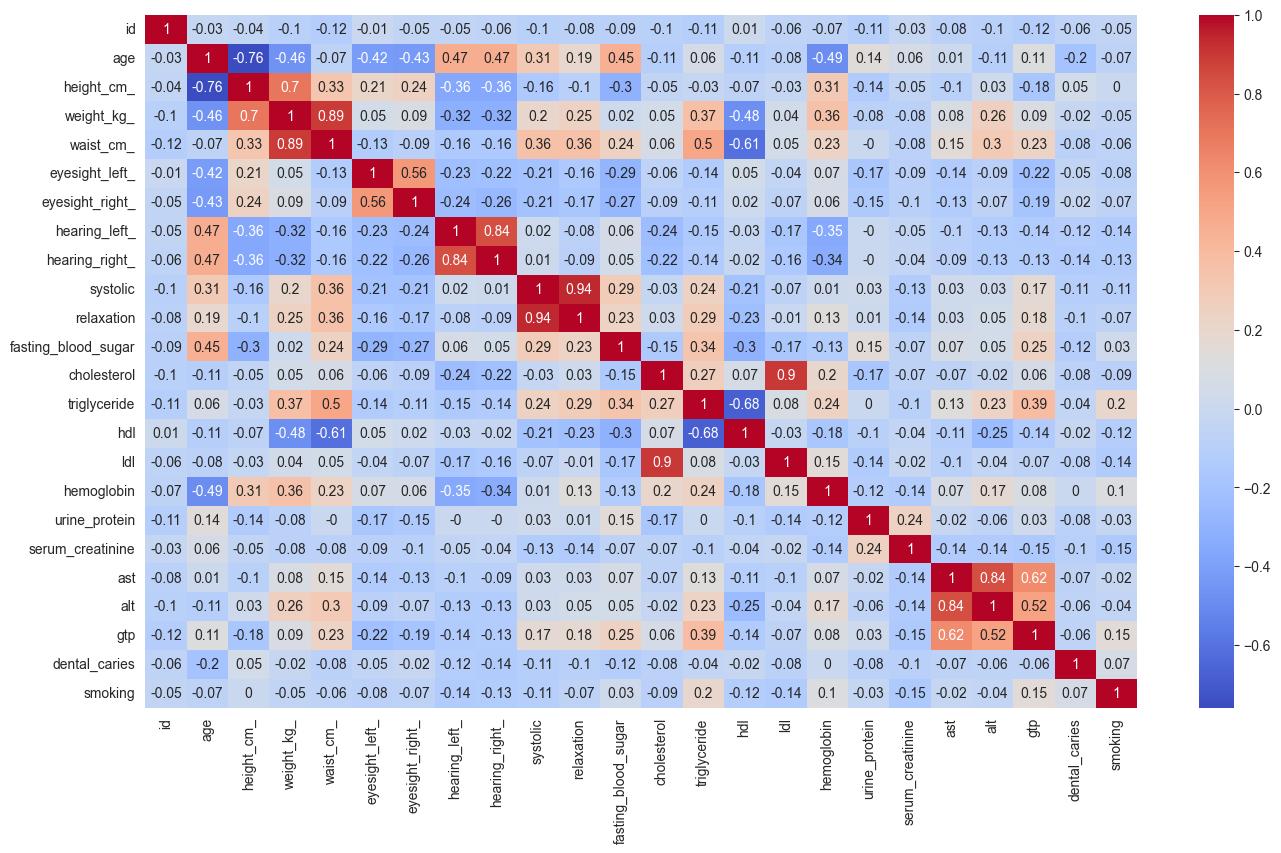

In [27]:
plt.figure(figsize=(16, 9))
sns.heatmap(round(corr_matrix.corr(),2), annot=True, cmap='coolwarm')
plt.show()

Проверка на корреляцию

In [28]:
correlated = SmartCorrelatedSelection(
    variables= None,
    method = 'pearson',
    threshold = 0.8,
    missing_values = 'ignore',
    selection_method = 'variance',
    estimator=None,
    scoring = 'roc_auc',
    cv=5)

correlated.fit(df)

SmartCorrelatedSelection(cv=5, selection_method='variance')

Смарт корреляция не рекомендует каких либо признаков к дропу

In [29]:
correlated.features_to_drop_

[]

## 5.3 Количественные признаки

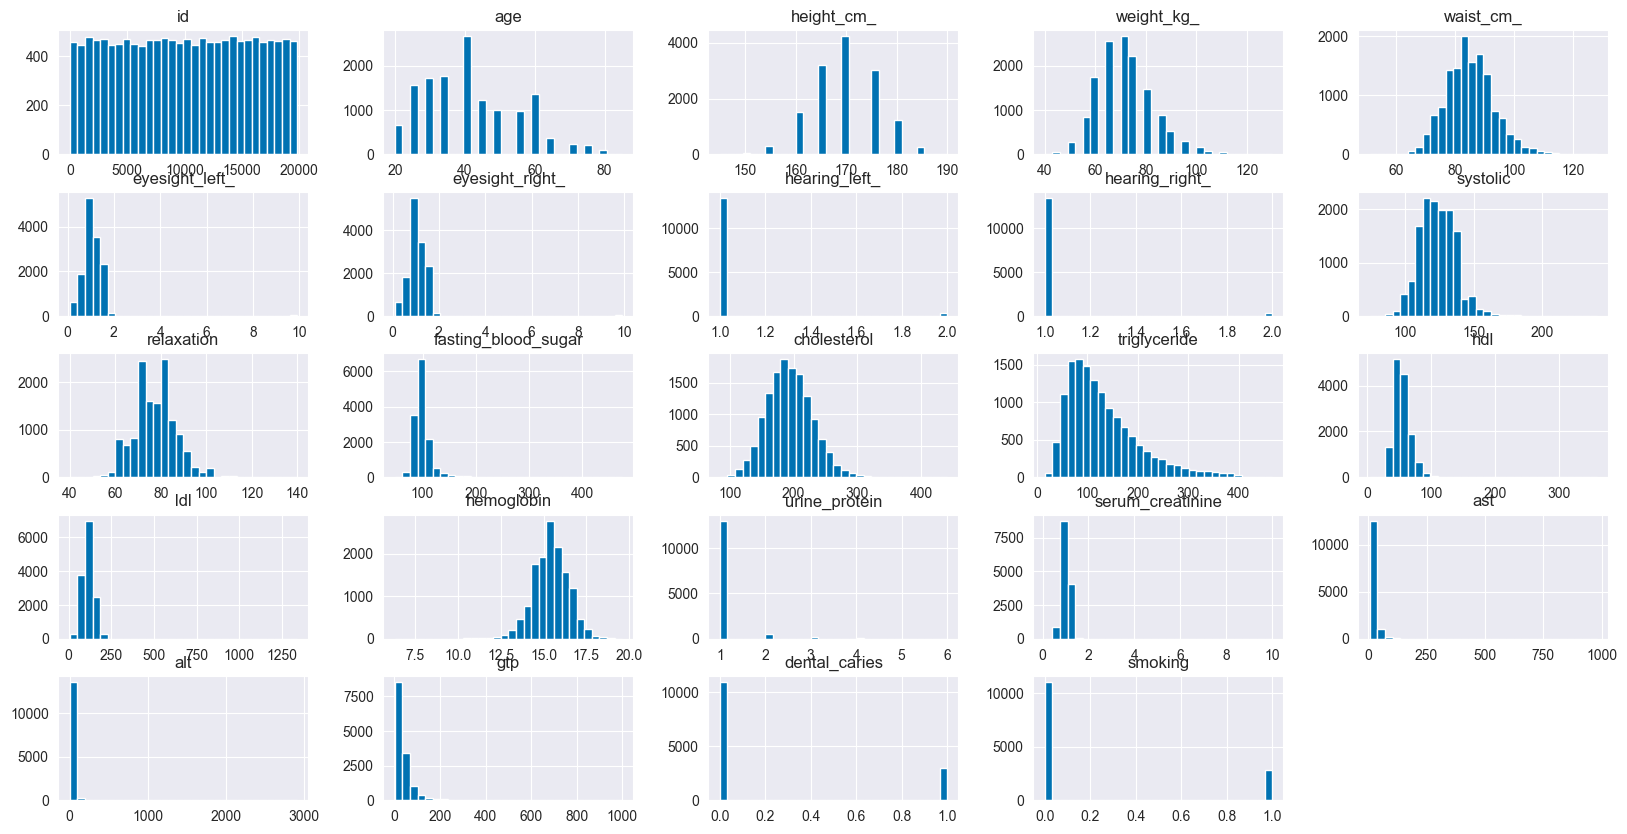

In [30]:
df.hist(figsize=(20, 10), bins=30, legend=False);
plt.show()

#### Функция гистограммы и описания для количественных признаков

In [31]:
def hist_box_describe_num(ds, x):
    print(ds[x].describe())
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    sns.histplot(data=ds, x=ds[x], kde=True);
    plt.subplot(1,2,2)
    sns.boxplot(data=ds, y=ds[x]);

### Smoking - Распределение курильшиков

Бинарный признак

In [32]:
df.smoking.value_counts()

smoking
0    11063
1     2800
Name: count, dtype: int64

count    13863.000000
mean         0.201976
std          0.401489
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: smoking, dtype: float64


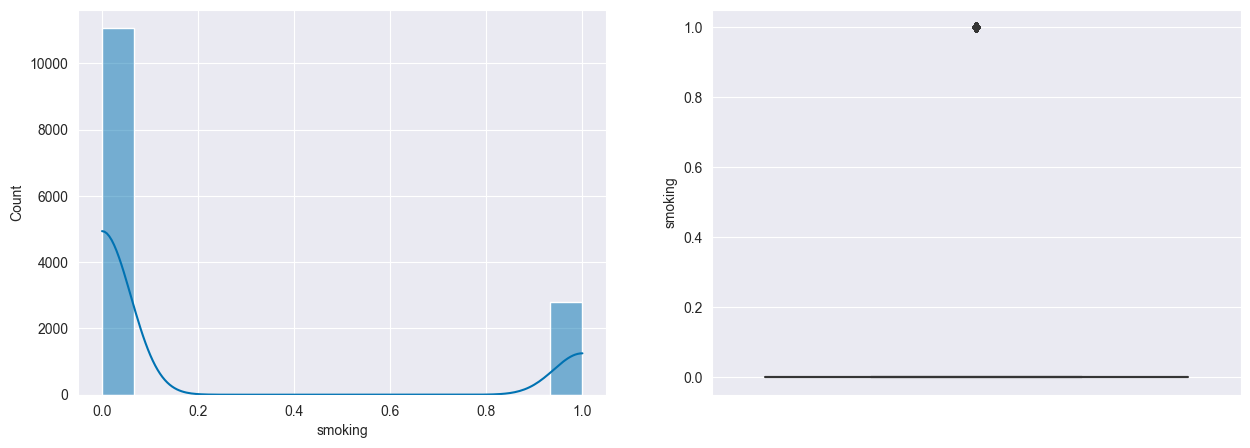

In [33]:
hist_box_describe_num(df, 'smoking')

Курильшиков ≈ 20% в обучающей выборке

### Age - возраст

count    13863.000000
mean        41.743851
std         13.624383
min         20.000000
25%         30.000000
50%         40.000000
75%         50.000000
max         85.000000
Name: age, dtype: float64


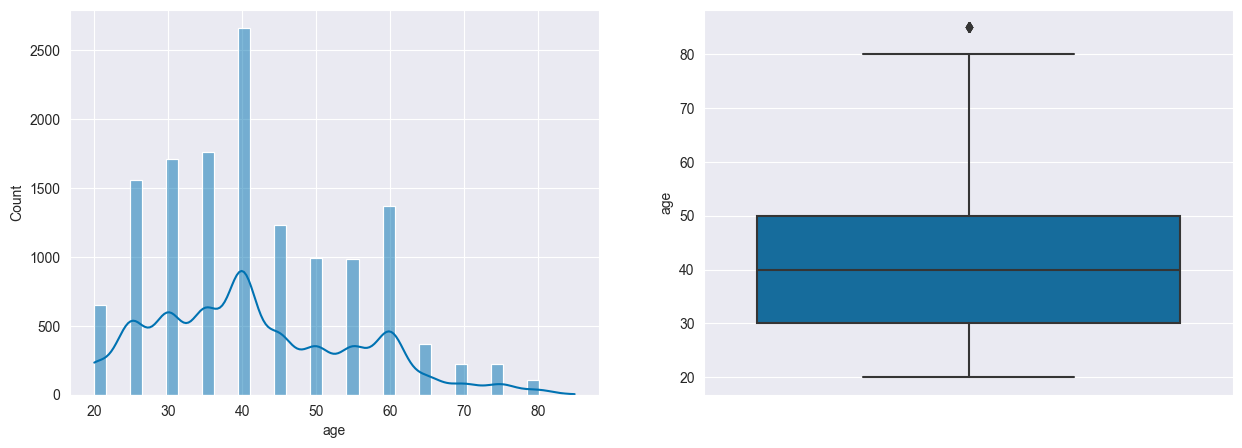

In [34]:
hist_box_describe_num(df, 'age')

Половина людей от 30 до 50 лет

### Height - рост

count    13863.000000
mean       169.618409
std          6.493959
min        145.000000
25%        165.000000
50%        170.000000
75%        175.000000
max        190.000000
Name: height_cm_, dtype: float64


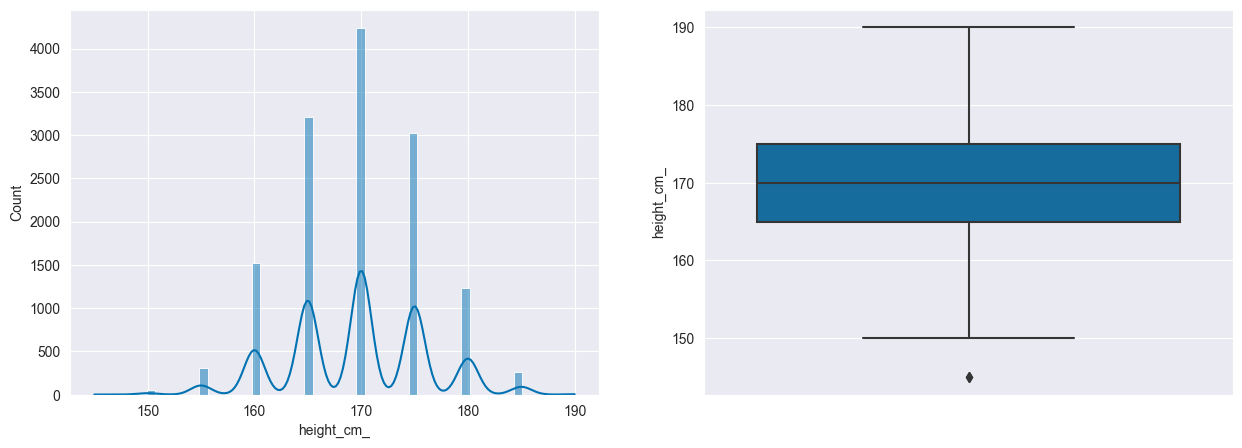

In [35]:
hist_box_describe_num(df, 'height_cm_')

Половина пациентов имеют рост от 165 до 175

### Waist - окружность талии

count    13863.000000
mean        84.870627
std          8.194957
min         51.000000
25%         79.200000
50%         84.400000
75%         90.000000
max        128.000000
Name: waist_cm_, dtype: float64


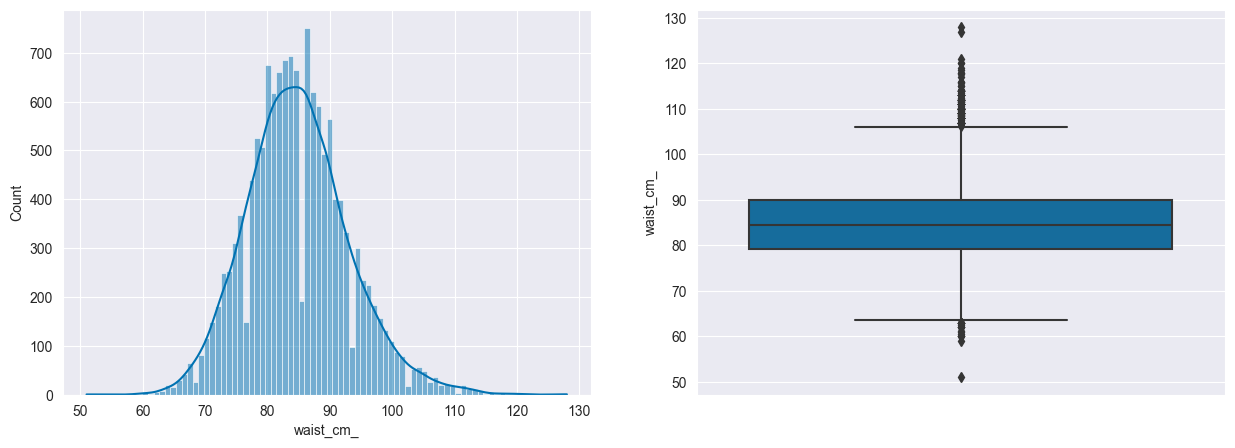

In [36]:
hist_box_describe_num(df, 'waist_cm_')

У половины пациентов окружность талии составляет от 79 до 90 см
**Выбросы в сравнении с тестом:** 2 пациента > 120

count    13861.000000
mean        84.864476
std          8.179530
min         51.000000
25%         79.200000
50%         84.400000
75%         90.000000
max        120.900000
Name: waist_cm_, dtype: float64


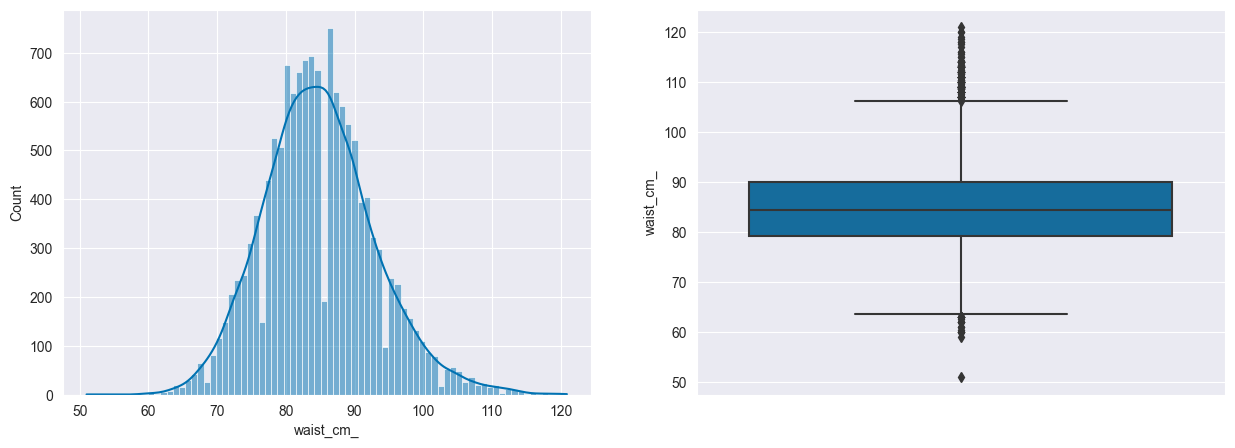

In [37]:
hist_box_describe_num(df.query('waist_cm_ < 125'), 'waist_cm_')

### Eyesight left - зрение левого глаза

count    13863.000000
mean         1.057304
std          0.514618
min          0.100000
25%          0.800000
50%          1.000000
75%          1.200000
max          9.900000
Name: eyesight_left_, dtype: float64


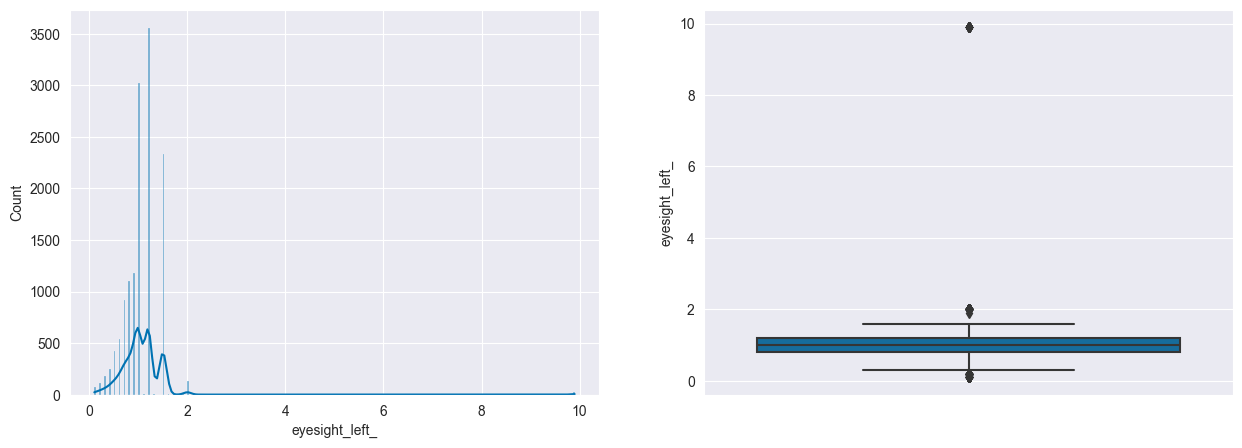

In [38]:
hist_box_describe_num(df, 'eyesight_left_')

Есть выбросы максимальных значений - 28, что составляет ≈0.2% от обучающей выборки
В тестовой выборке похожие выбросы

### Eyesight right - зрение правого глаза

count    13863.000000
mean         1.053740
std          0.514613
min          0.100000
25%          0.800000
50%          1.000000
75%          1.200000
max          9.900000
Name: eyesight_right_, dtype: float64


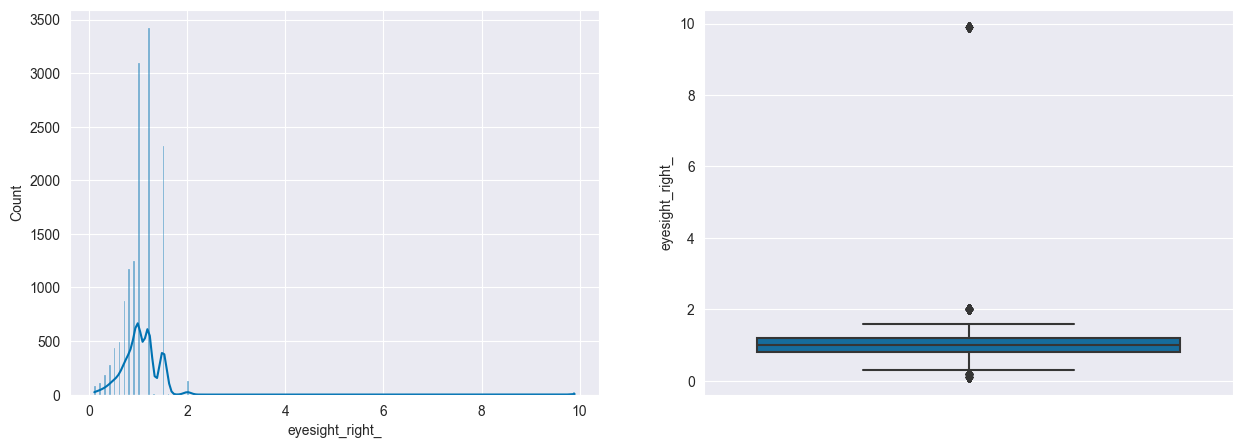

In [39]:
hist_box_describe_num(df, 'eyesight_right_')

Есть выбросы максимальных значений - 28, что составляет ≈0.2% от обучающей выборки
В тестовой выборке похожие выбросы

### Hearing left - слышимость левого уха

Бинарный признак

In [40]:
df.hearing_left_.value_counts()

hearing_left_
1.0    13474
2.0      389
Name: count, dtype: int64

У ≈2.8% пациентов не слышит левое ухо

count    13863.000000
mean         1.028060
std          0.165151
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: hearing_left_, dtype: float64


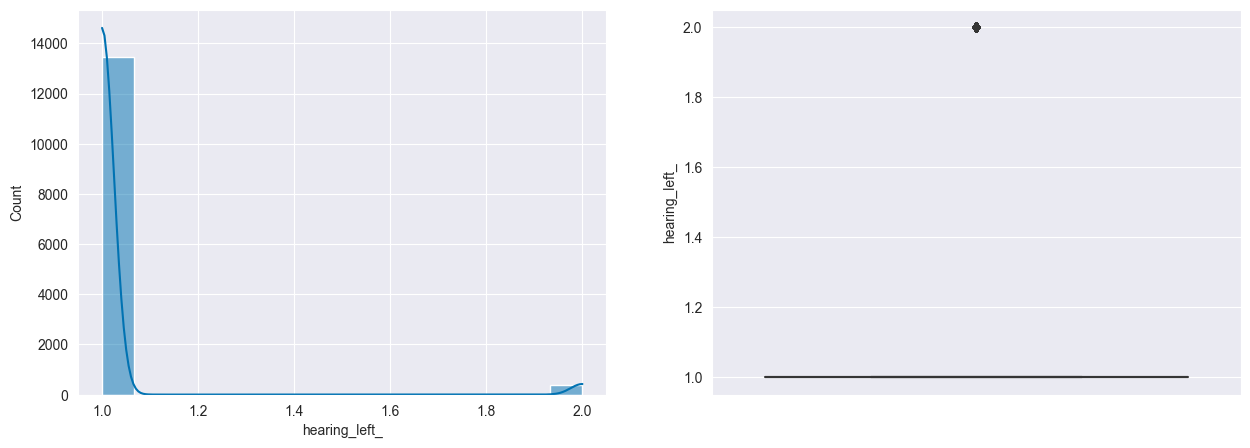

In [41]:
hist_box_describe_num(df, 'hearing_left_')

### Hearing right - слышимость правого уха

Бинарный признак

In [42]:
df.hearing_right_.value_counts()

hearing_right_
1.0    13483
2.0      380
Name: count, dtype: int64

У ≈2.7% пациентов не слышит правое ухо

count    13863.000000
mean         1.027411
std          0.163284
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: hearing_right_, dtype: float64


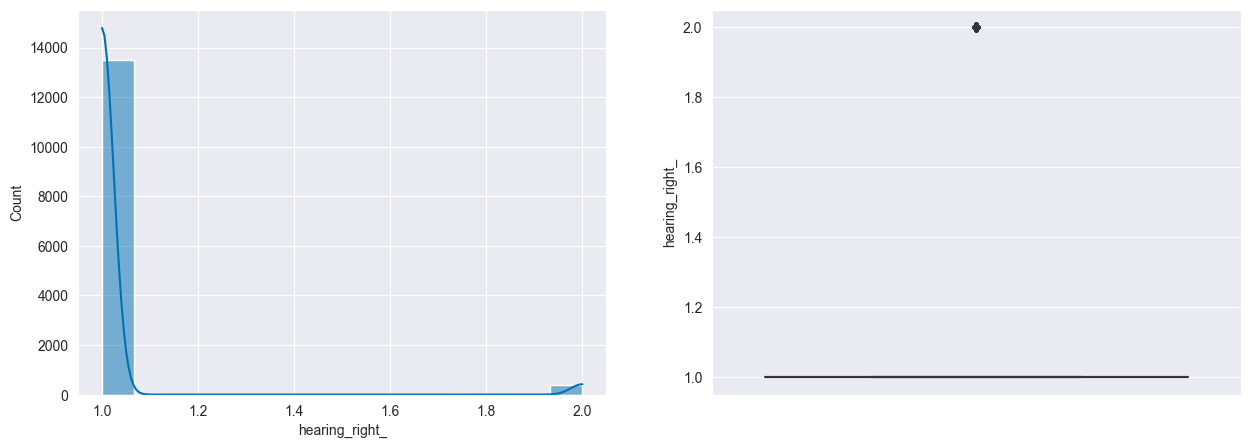

In [43]:
hist_box_describe_num(df, 'hearing_right_')

### Systolic - систолическое давление

count    13863.000000
mean       123.430643
std         12.964684
min         74.000000
25%        115.000000
50%        122.000000
75%        131.000000
max        240.000000
Name: systolic, dtype: float64


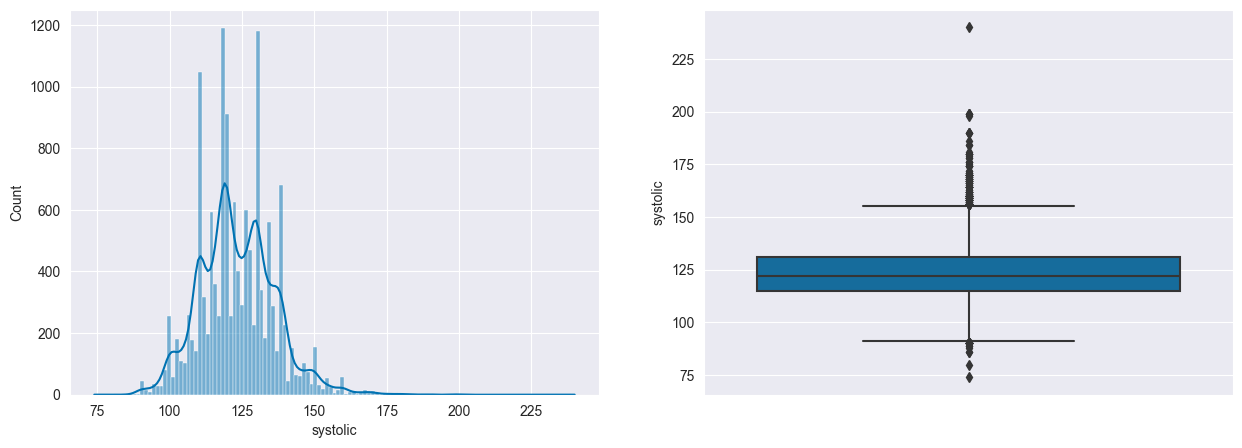

In [44]:
hist_box_describe_num(df, 'systolic')

У половины пациентов систолическое давление находится в пределах от 115 до 131
**Выбросы в сравнении с тестом:** ВСЕГО 3 - 1 пациент > 200, 2 пациента < 85

count    13860.000000
mean       123.428932
std         12.916135
min         86.000000
25%        115.000000
50%        122.000000
75%        131.000000
max        199.000000
Name: systolic, dtype: float64


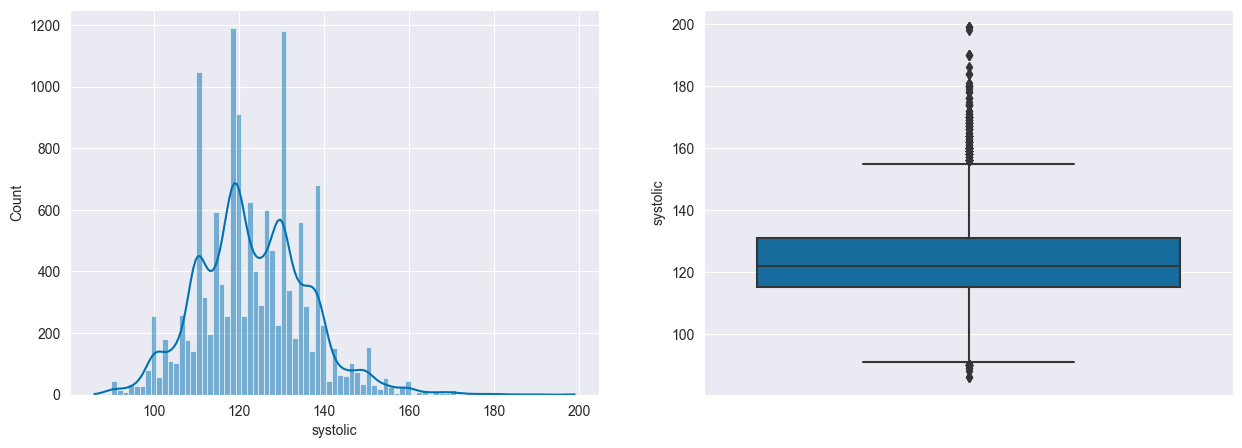

In [45]:
hist_box_describe_num(df.query('systolic < 230 & systolic > 80'), 'systolic')

### Relaxation - диастолическое давление

count    13863.000000
mean        77.166703
std          9.459288
min         40.000000
25%         70.000000
50%         78.000000
75%         83.000000
max        140.000000
Name: relaxation, dtype: float64


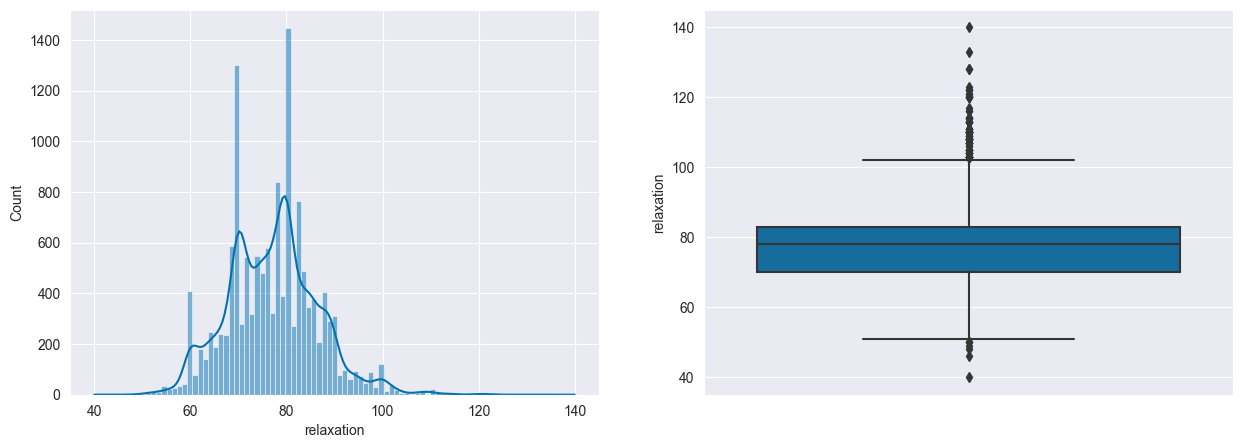

In [46]:
hist_box_describe_num(df, 'relaxation')

У половины пациентов диастолическое давление находится в пределах от 70 до 83
**Выбросы в сравнении с тестом:** ВСЕГО 2 - 1 пациент > 133, 1 пациент < 45

count    13861.000000
mean        77.164851
std          9.439625
min         46.000000
25%         70.000000
50%         78.000000
75%         83.000000
max        133.000000
Name: relaxation, dtype: float64


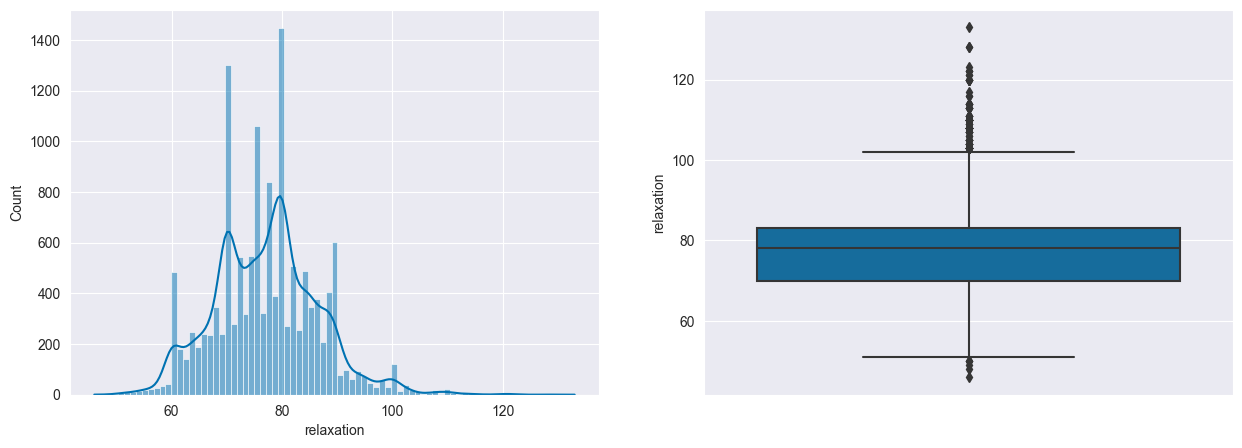

In [47]:
hist_box_describe_num(df.query('relaxation < 135 & relaxation > 45'), 'relaxation')

### Fasting blood sugar - Сахар в крови

count    13863.000000
mean        99.937387
std         20.682085
min         48.000000
25%         90.000000
50%         96.000000
75%        104.000000
max        475.000000
Name: fasting_blood_sugar, dtype: float64


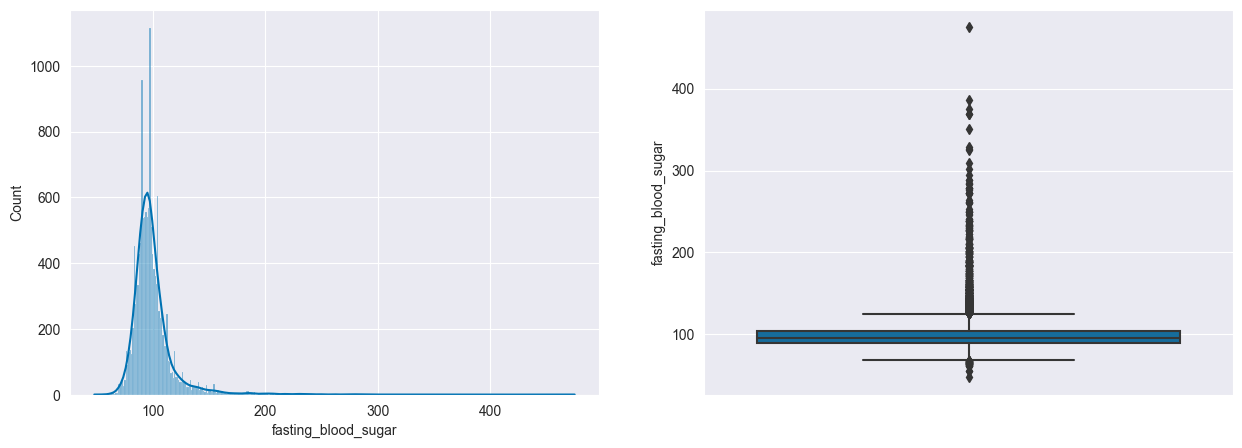

In [48]:
hist_box_describe_num(df, 'fasting_blood_sugar')

У половины пациентов сахар в крови находится в пределах от 90 до 104
**Выбросы в сравнении с тестом:** Всего 2 - 1 пациент > 450, 1 пациент < 50

count    13861.000000
mean        99.914075
std         20.431977
min         56.000000
25%         90.000000
50%         96.000000
75%        104.000000
max        386.000000
Name: fasting_blood_sugar, dtype: float64


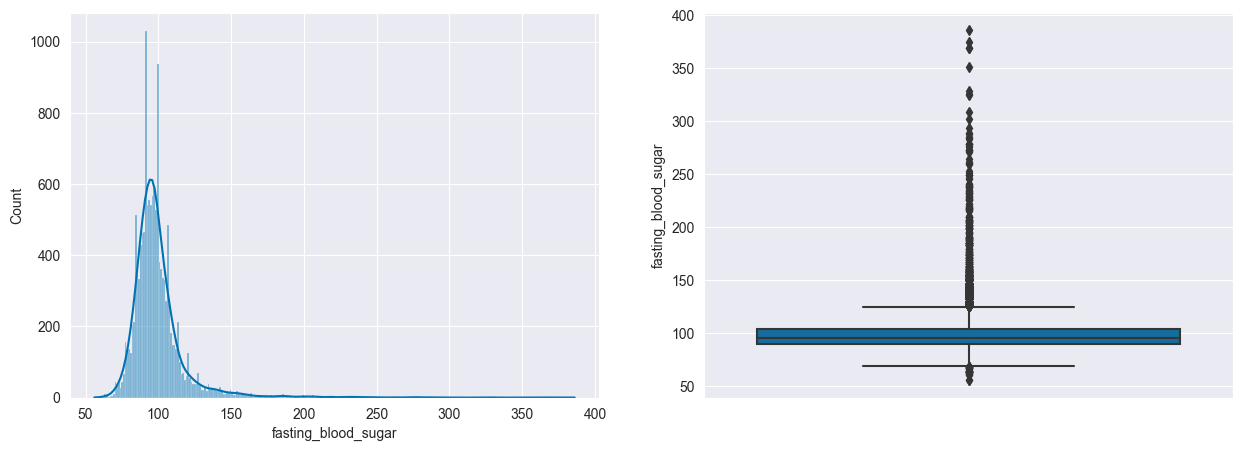

In [49]:
hist_box_describe_num(df.query('fasting_blood_sugar < 450 & fasting_blood_sugar > 50'), 'fasting_blood_sugar')

### Cholesterol - холестерин

count    13863.000000
mean       193.864387
std         35.658783
min         84.000000
25%        169.000000
50%        192.000000
75%        216.000000
max        441.000000
Name: cholesterol, dtype: float64


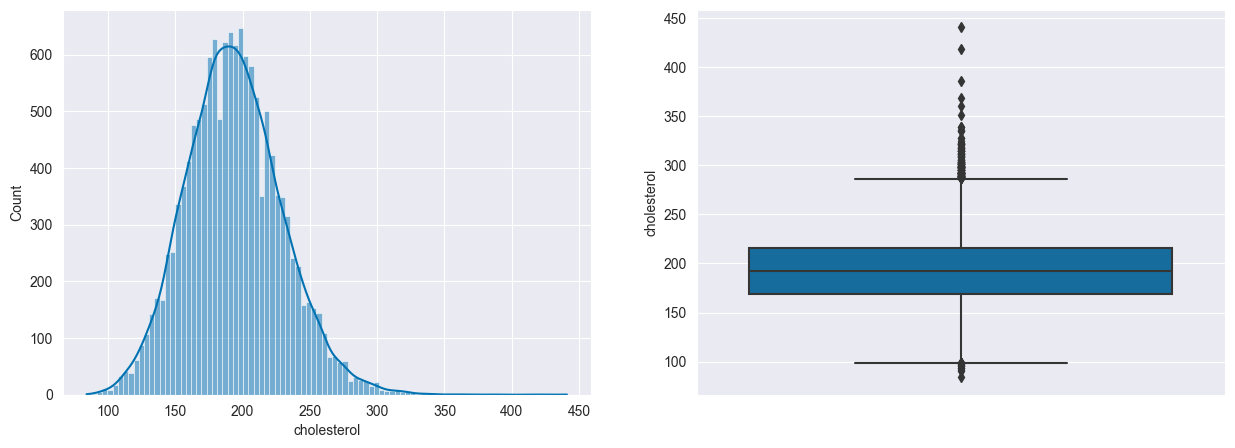

In [50]:
hist_box_describe_num(df, 'cholesterol')

У половины пациентов холестерин находится в пределах от 169 до 216
**Выбросы в сравнении с тестом:** 2 пациента > 400,

count    13861.000000
mean       193.830315
std         35.548101
min         84.000000
25%        169.000000
50%        192.000000
75%        216.000000
max        386.000000
Name: cholesterol, dtype: float64


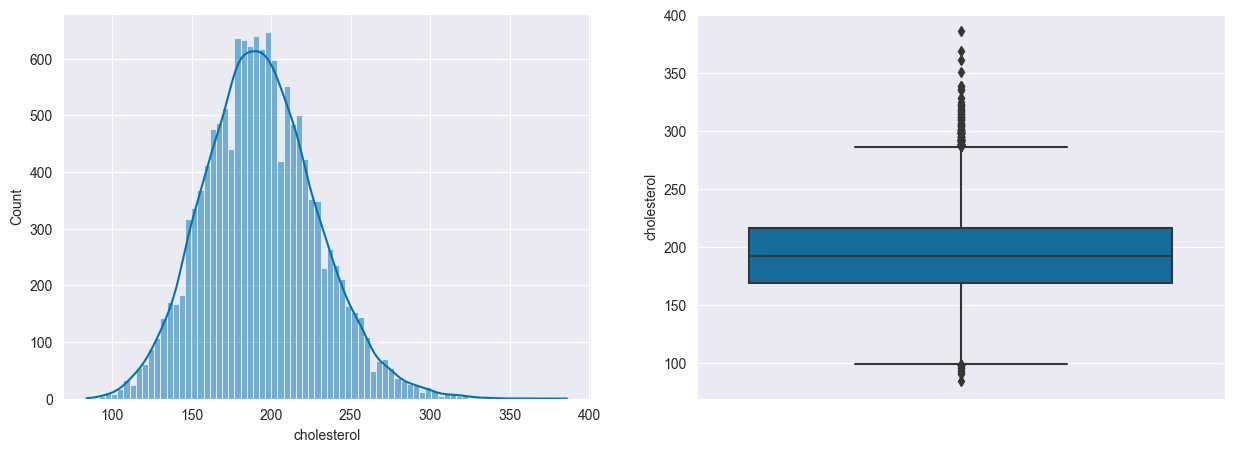

In [51]:
hist_box_describe_num(df.query('cholesterol < 400'), 'cholesterol')

### Triglyceride - триглицерид

count    13863.000000
mean       130.917767
std         71.348298
min         16.000000
25%         78.000000
50%        113.000000
75%        166.000000
max        466.000000
Name: triglyceride, dtype: float64


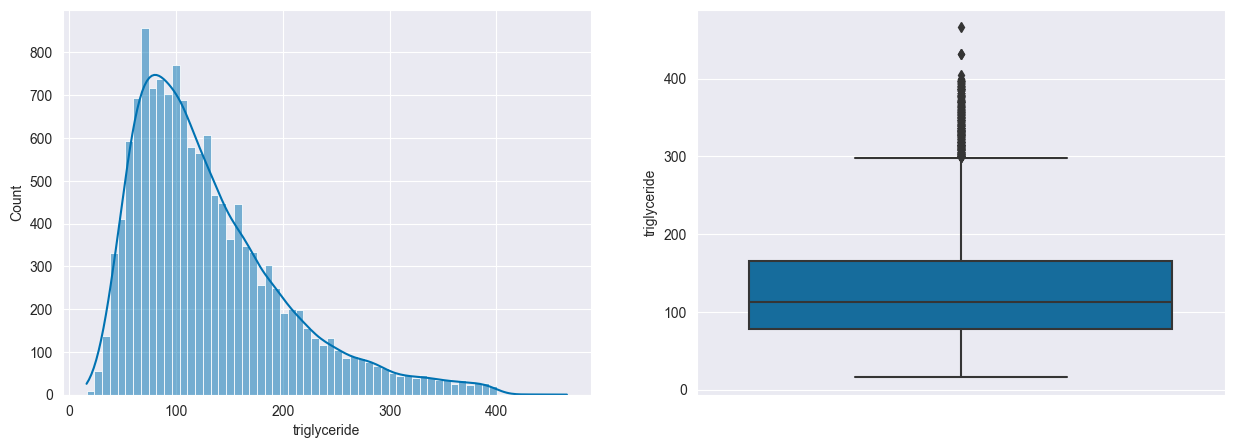

In [52]:
hist_box_describe_num(df, 'triglyceride')

У половины пациентов триглицерид находится в пределах от 78 до 166
**Выбросы в сравнении с тестом:** 6 пациентов < 20,

count    13857.000000
mean       130.966371
std         71.325478
min         21.000000
25%         78.000000
50%        113.000000
75%        166.000000
max        466.000000
Name: triglyceride, dtype: float64


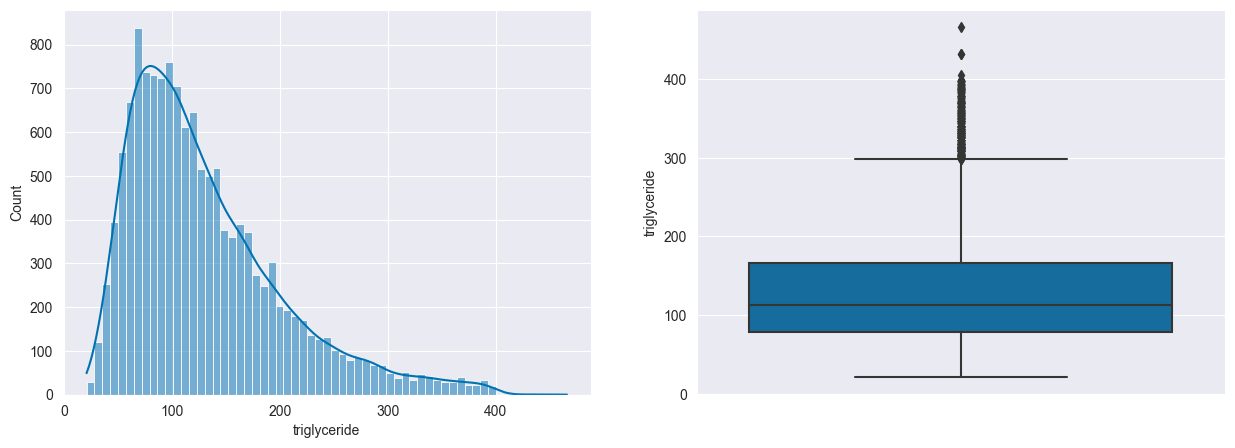

In [53]:
hist_box_describe_num(df.query('triglyceride > 20'), 'triglyceride')

### HDL - холестерин липопротеинов высокой плотности

count    13863.000000
mean        54.204357
std         13.168432
min          4.000000
25%         45.000000
50%         53.000000
75%         61.000000
max        359.000000
Name: hdl, dtype: float64


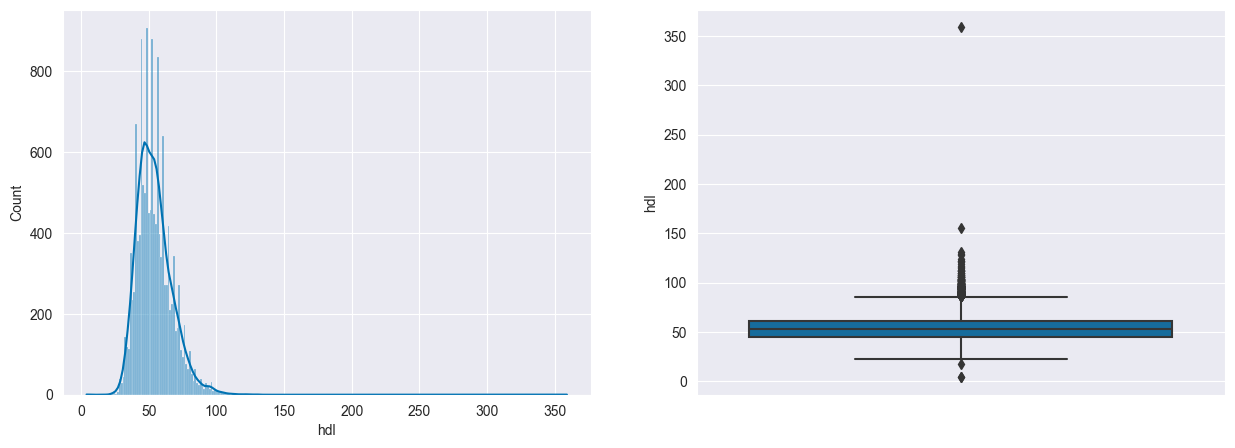

In [54]:
hist_box_describe_num(df, 'hdl')

У половины пациентов холестерин липопротеинов находится в пределах от 45 до 61
**Выбросы в сравнении с тестом:** Всего 4 - 1 пациент > 160, 3 пациента < 20,

count    13859.000000
mean        54.192294
std         12.895353
min         22.000000
25%         45.000000
50%         53.000000
75%         61.000000
max        155.000000
Name: hdl, dtype: float64


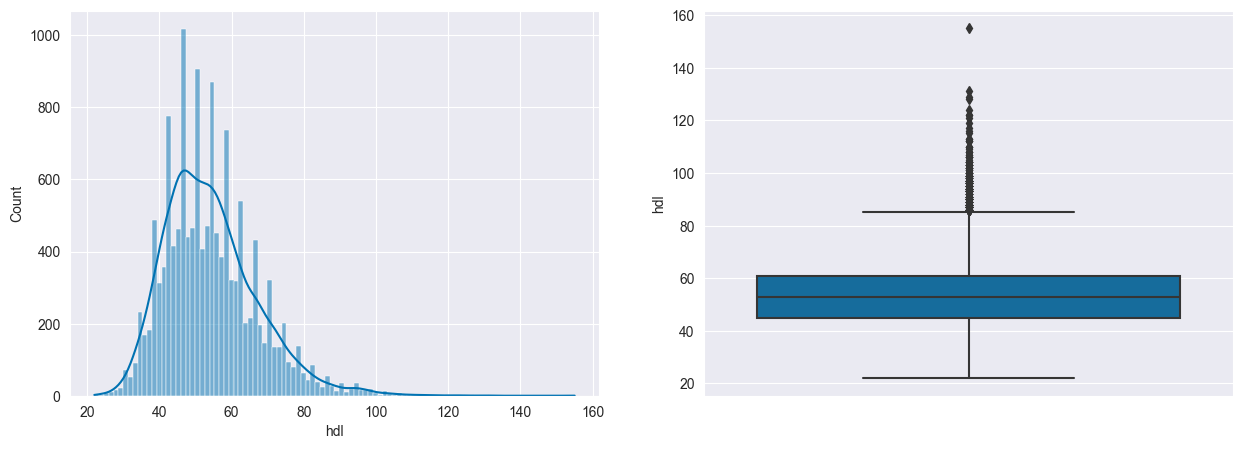

In [55]:
hist_box_describe_num(df.query('hdl < 200 & hdl > 20'), 'hdl')

### LDL - липопротеины низкой плотности

count    13863.000000
mean       114.435476
std         42.050428
min          7.000000
25%         91.000000
50%        113.000000
75%        135.000000
max       1340.000000
Name: ldl, dtype: float64


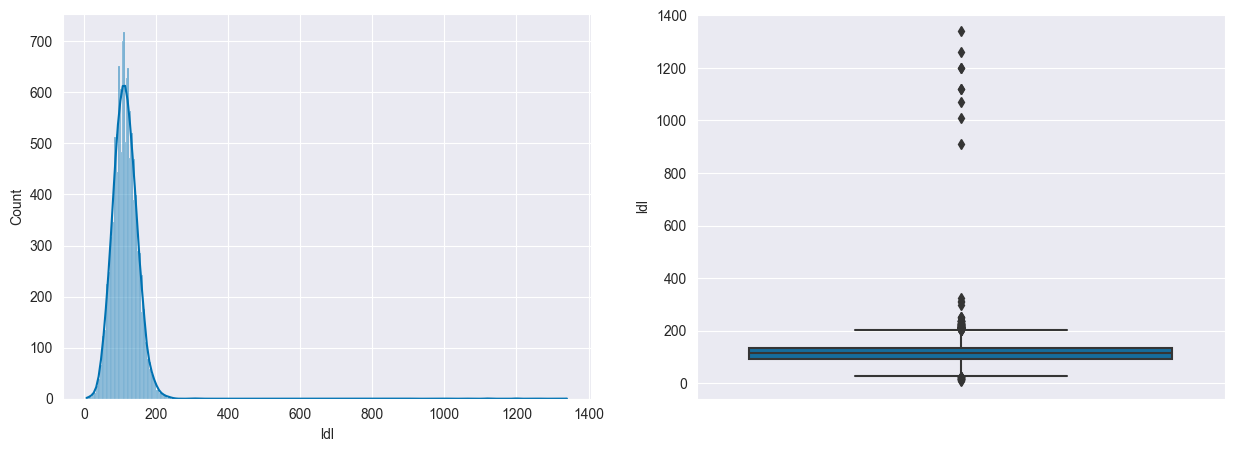

In [56]:
hist_box_describe_num(df, 'ldl')

У половины пациентов липопротеины находится в пределах от 91 до 135
**Выбросы в сравнении с тестом:** Всего 9 - 6 пациентов > 1100, 3 пациента < 20,

count    13854.000000
mean       113.985275
std         35.319959
min         11.000000
25%         91.000000
50%        113.000000
75%        135.000000
max       1070.000000
Name: ldl, dtype: float64


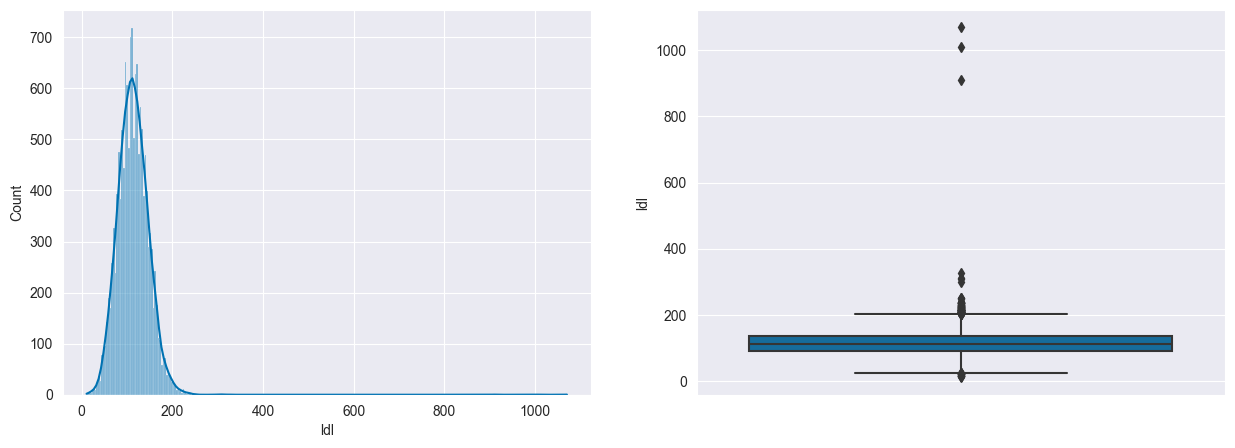

In [57]:
hist_box_describe_num(df.query('ldl < 1100 & ldl > 10'), 'ldl')

### Hemoglobin - гемоглобин

count    13863.000000
mean        15.402200
std          1.052598
min          6.300000
25%         14.800000
50%         15.400000
75%         16.100000
max         19.600000
Name: hemoglobin, dtype: float64


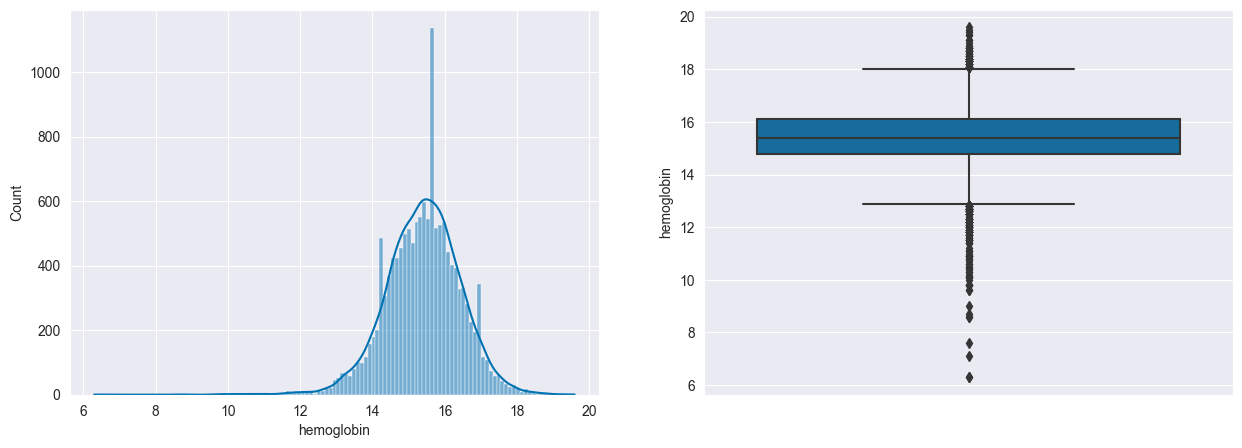

In [58]:
hist_box_describe_num(df, 'hemoglobin')

У половины пациентов гемоглобин находится в пределах от 14.8 до 16.1
**Выбросы в сравнении с тестом:** Всего 9 - 3 пациента > 19.4, 6 пациентов < 8.6,

count    13854.000000
mean        15.404771
std          1.037798
min          8.700000
25%         14.800000
50%         15.400000
75%         16.100000
max         19.300000
Name: hemoglobin, dtype: float64


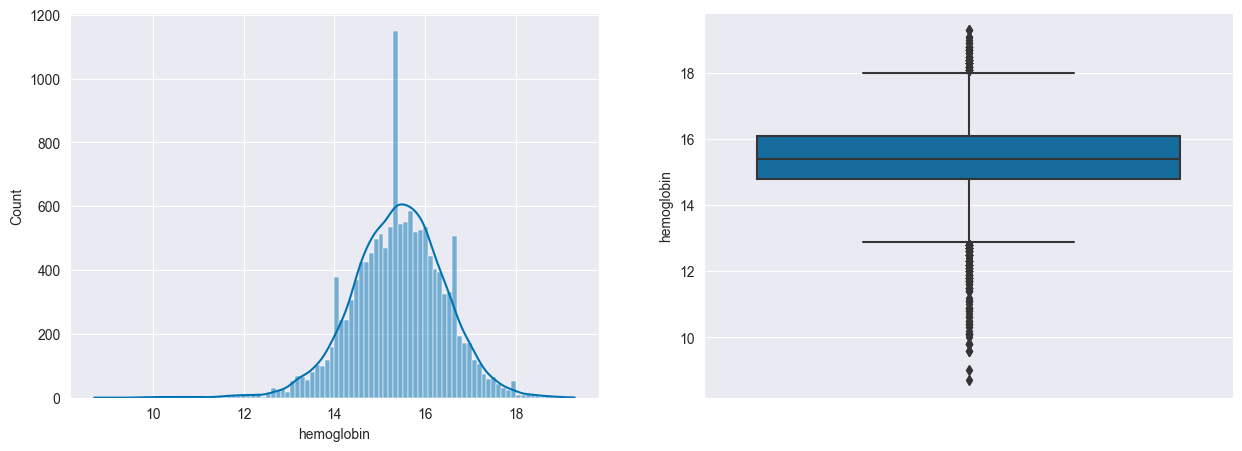

In [59]:
hist_box_describe_num(df.query('hemoglobin < 19.4 & hemoglobin > 8.6'), 'hemoglobin')

### Urine protein - белок в моче

count    13863.000000
mean         1.093775
std          0.421272
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          6.000000
Name: urine_protein, dtype: float64


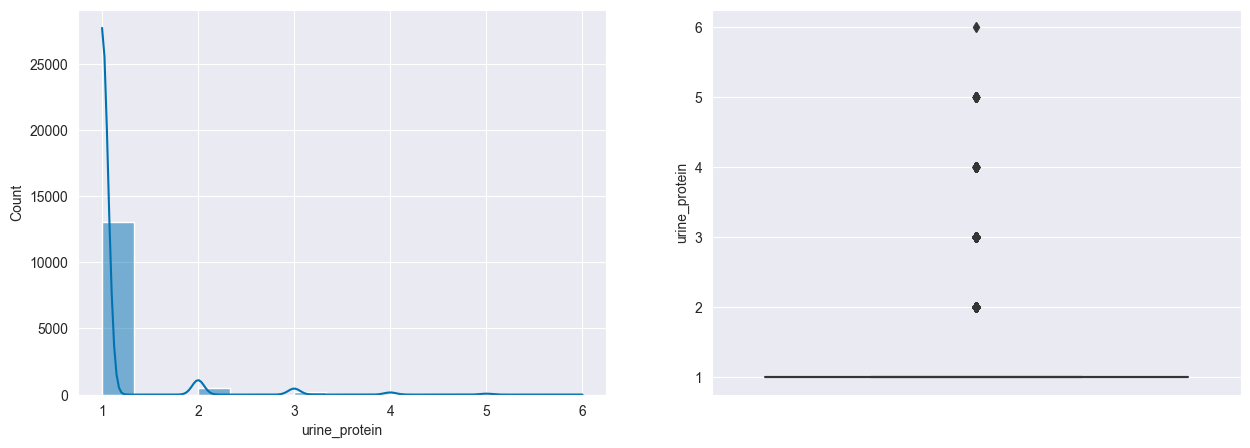

In [60]:
hist_box_describe_num(df, 'urine_protein')

У большинства пациентов белок в моче находится в пределах 1-цы

### Serum creatinine - Сывороточный креатинин

count    13863.000000
mean         0.981808
std          0.240337
min          0.100000
25%          0.900000
50%          1.000000
75%          1.100000
max         10.000000
Name: serum_creatinine, dtype: float64


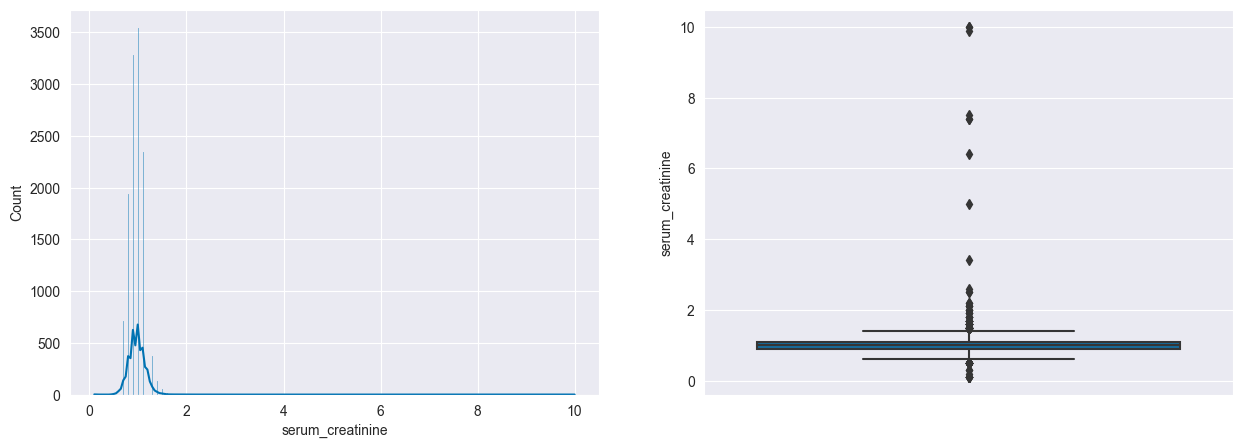

In [61]:
hist_box_describe_num(df, 'serum_creatinine')

У половины пациентов сывороточный креатинин находится в пределах от 0.9 до 1.1
**Выбросы в сравнении с тестом:** 10 пациентов > 2.6

count    13853.000000
mean         0.977492
std          0.165498
min          0.100000
25%          0.900000
50%          1.000000
75%          1.100000
max          2.500000
Name: serum_creatinine, dtype: float64


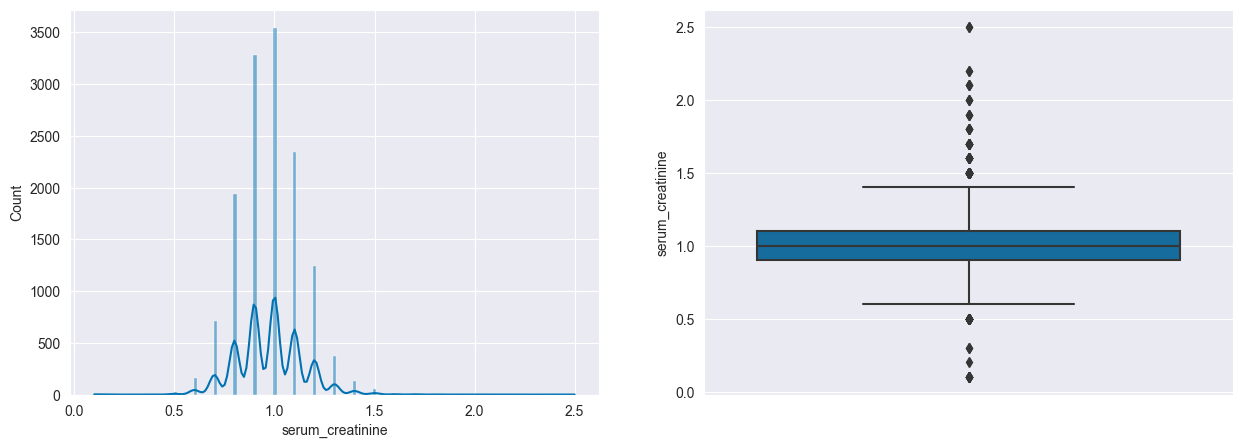

In [62]:
hist_box_describe_num(df.query('serum_creatinine < 2.6'), 'serum_creatinine')

### AST - Аспартатаминотрансфераз

count    13863.000000
mean        27.597562
std         21.559820
min          7.000000
25%         20.000000
50%         24.000000
75%         30.000000
max        981.000000
Name: ast, dtype: float64


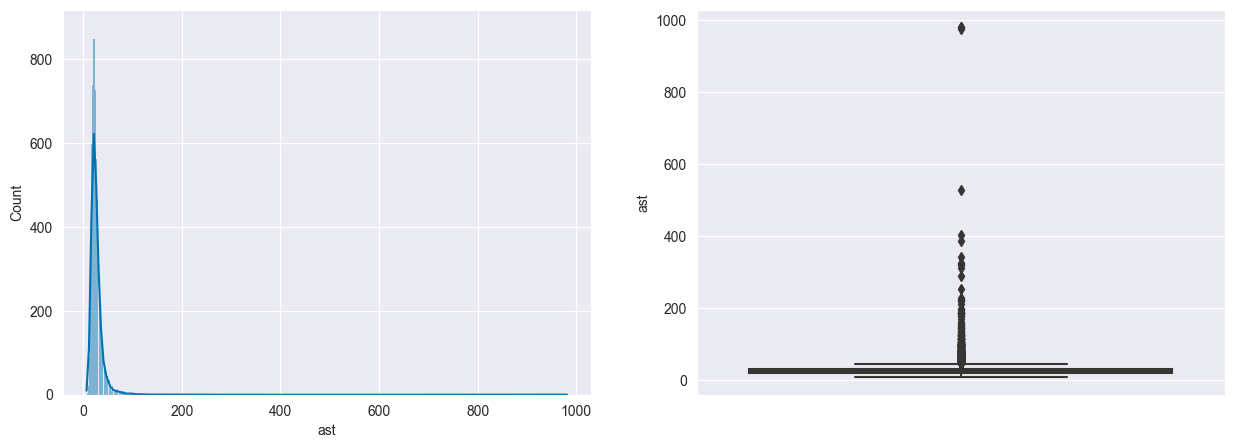

In [63]:
hist_box_describe_num(df, 'ast')

У половины пациентов Аспартатаминотрансфераз находится в пределах от 20 до 30
**Выбросы в сравнении с тестом:** Всего 4 - 3 пациента > 600, 1 пациент < 9

count    13859.000000
mean        27.393030
std         16.395037
min          9.000000
25%         20.000000
50%         24.000000
75%         30.000000
max        527.000000
Name: ast, dtype: float64


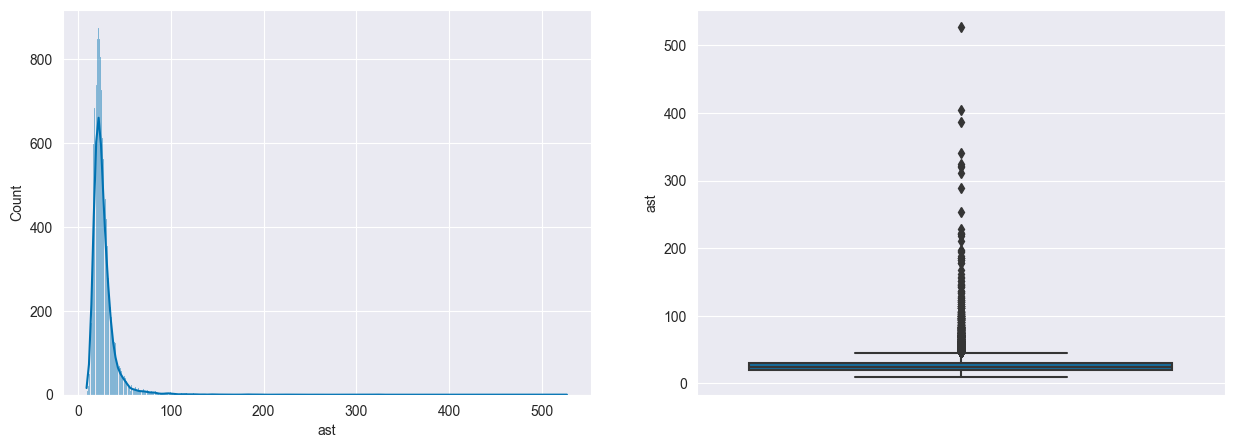

In [64]:
hist_box_describe_num(df.query('ast < 800 & ast > 8'), 'ast')

### ALT - Аланинаминотрансфераза

count    13863.000000
mean        30.772921
std         36.441688
min          2.000000
25%         18.000000
50%         24.000000
75%         35.000000
max       2914.000000
Name: alt, dtype: float64


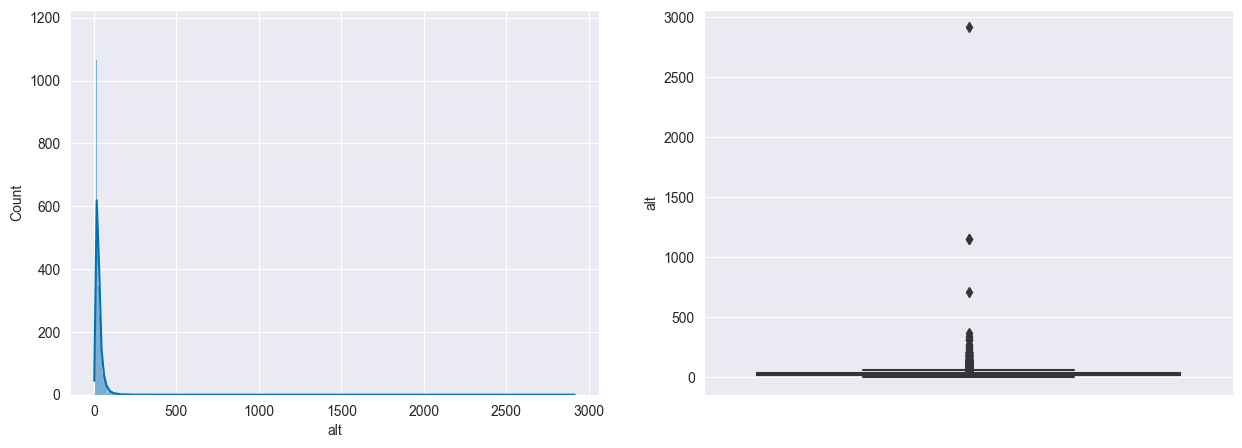

In [65]:
hist_box_describe_num(df, 'alt')

У половины пациентов Аланинаминотрансфераза находится в пределах от 18 до 35
**Выбросы в сравнении с тестом:** Всего 3 - 1 пациента > 1600, 2 пациента < 4

count    13860.000000
mean        30.568975
std         26.987041
min          4.000000
25%         18.000000
50%         24.000000
75%         35.000000
max       1155.000000
Name: alt, dtype: float64


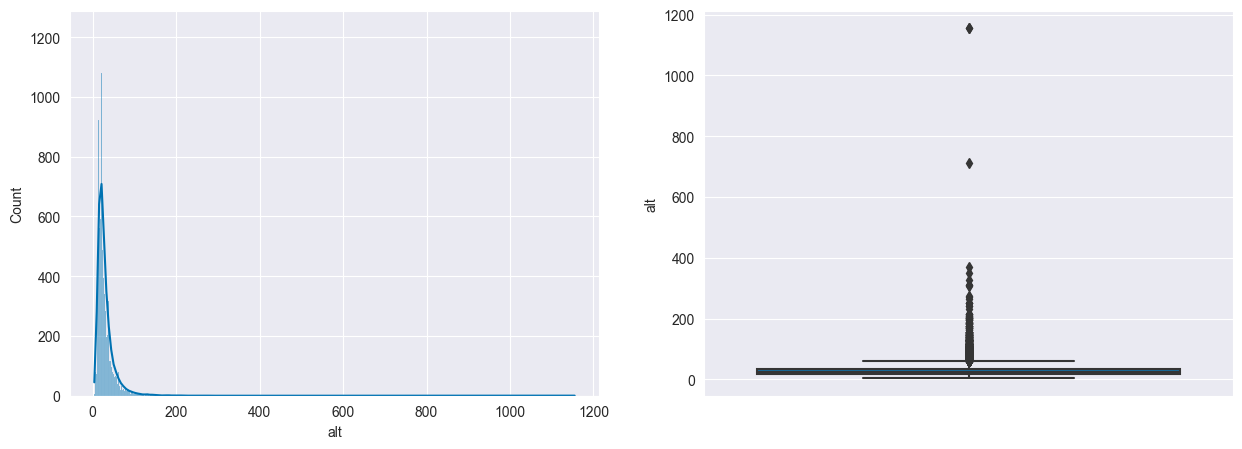

In [66]:
hist_box_describe_num(df.query('alt < 1600 & alt > 3'), 'alt')

### Gtp - Гамма‑глютамилтранспептидаза

count    13863.000000
mean        43.442978
std         50.342097
min          2.000000
25%         20.000000
50%         29.000000
75%         48.000000
max        999.000000
Name: gtp, dtype: float64


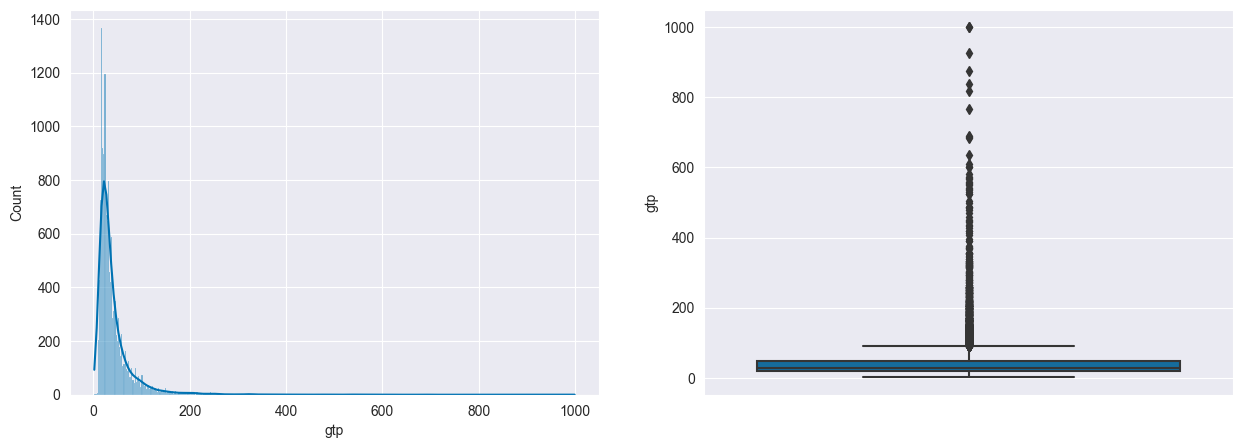

In [67]:
hist_box_describe_num(df, 'gtp')

У половины пациентов Гамма‑глютамилтранспептидаза находится в пределах от 20 до 48

### Dental caries - Кариес

Бинарный признак

In [68]:
df.dental_caries.value_counts()

dental_caries
0    10923
1     2940
Name: count, dtype: int64

count    13863.000000
mean         0.212075
std          0.408793
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: dental_caries, dtype: float64


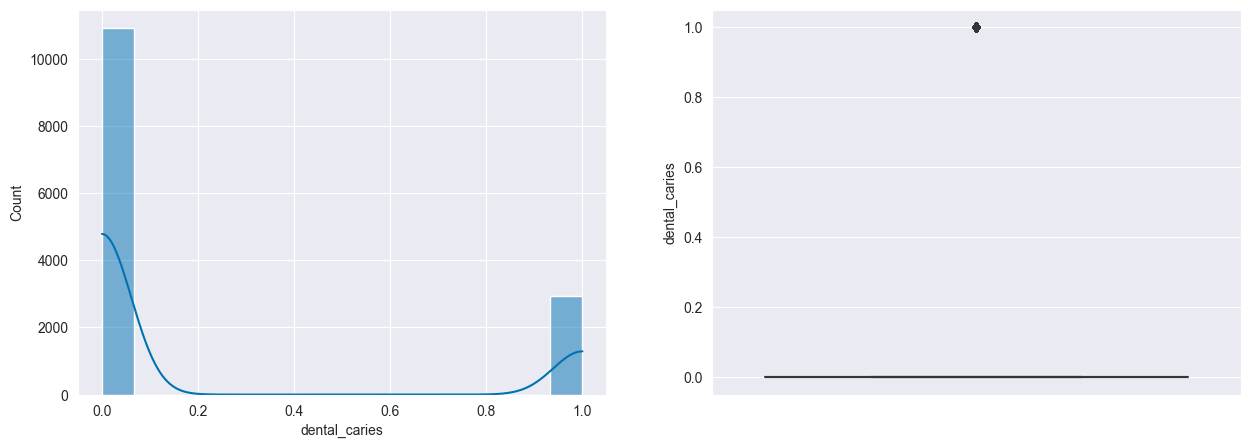

In [69]:
hist_box_describe_num(df, 'dental_caries')

Кариес имеют ≈ 21.2% пациентов в обучающей выборке

## 5.4 Категориальные переменные

In [70]:
df.describe(include='object')

,oral,tartar
count,13863,13863
unique,1,2
top,Y,Y
freq,13863,7517


Думаю переменную Oral можно будет дропнуть, так как все её значения одинаковые - Y

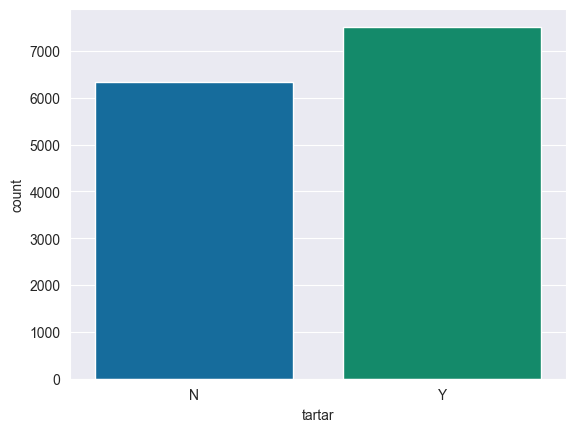

In [71]:
sns.countplot(data = df, x='tartar');

Людей, у которых есть зубной камень - больше, чем у которых нет

# 6. Preprocessing

## 6.1 Список всех фич

In [72]:
X = [i for i in df.columns]
X.remove('smoking')
X.remove('oral')
cat_features = [i for i in df.columns if df[i].dtype == 'object']
cat_features.remove('oral')
y = ['smoking']

In [73]:
X

['id',
 'age',
 'height_cm_',
 'weight_kg_',
 'waist_cm_',
 'eyesight_left_',
 'eyesight_right_',
 'hearing_left_',
 'hearing_right_',
 'systolic',
 'relaxation',
 'fasting_blood_sugar',
 'cholesterol',
 'triglyceride',
 'hdl',
 'ldl',
 'hemoglobin',
 'urine_protein',
 'serum_creatinine',
 'ast',
 'alt',
 'gtp',
 'dental_caries',
 'tartar']

In [74]:
cat_features

['tartar']

In [75]:
dddddddddddddd

NameError: name 'dddddddddddddd' is not defined

## 6.2 Удаление выбросов

### Waist - окружность талии

У половины пациентов окружность талии составляет от 79 до 90 см
**Выбросы в сравнении с тестом:** 2 пациента > 121

In [76]:
df = df.query('waist_cm_ < 121')

### Systolic - систолическое давление

У половины пациентов систолическое давление находится в пределах от 115 до 131
**Выбросы в сравнении с тестом:** ВСЕГО 3 - 1 пациент > 200, 2 пациента < 85

In [77]:
df = df.query('systolic < 200 & systolic > 85')

### Relaxation - диастолическое давление

У половины пациентов диастолическое давление находится в пределах от 70 до 83
**Выбросы в сравнении с тестом:** ВСЕГО 2 - 1 пациент > 133, 1 пациент < 45

In [78]:
df = df.query('relaxation < 135 & relaxation > 45')

### Fasting blood sugar - Сахар в крови

У половины пациентов сахар в крови находится в пределах от 90 до 104
**Выбросы в сравнении с тестом:** Всего 2 - 1 пациент > 400, 1 пациент < 50

In [79]:
df = df.query('fasting_blood_sugar < 400 & fasting_blood_sugar > 50')

### Cholesterol - холестерин

У половины пациентов холестерин находится в пределах от 169 до 216
**Выбросы в сравнении с тестом:** 2 пациента > 400,

In [80]:
df = df.query('cholesterol < 400')

### Triglyceride - триглицерид

У половины пациентов триглицерид находится в пределах от 78 до 166
**Выбросы в сравнении с тестом:** 6 пациентов < 20,

In [81]:
df = df.query('triglyceride > 20')

### HDL - холестерин липопротеинов высокой плотности

У половины пациентов холестерин липопротеинов находится в пределах от 45 до 61
**Выбросы в сравнении с тестом:** Всего 4 - 1 пациент > 160, 3 пациента < 20,

In [82]:
df = df.query('hdl < 160 & hdl > 20')

### LDL - липопротеины низкой плотности

У половины пациентов липопротеины находится в пределах от 91 до 135
**Выбросы в сравнении с тестом:** Всего 9 - 6 пациентов > 1100, 3 пациента < 10,

In [83]:
df = df.query('ldl < 1100 & ldl > 10')

### Hemoglobin - гемоглобин

У половины пациентов гемоглобин находится в пределах от 14.8 до 16.1
**Выбросы в сравнении с тестом:** Всего 9 - 3 пациента > 19.4, 6 пациентов < 8.6,

In [84]:
df = df.query('hemoglobin < 19.4 & hemoglobin > 8.6')

### Serum creatinine - Сывороточный креатинин

У половины пациентов сывороточный креатинин находится в пределах от 0.9 до 1.1
**Выбросы в сравнении с тестом:** 10 пациентов > 2.6

In [85]:
df = df.query('serum_creatinine < 2.6')

### AST - Аспартатаминотрансфераз

У половины пациентов Аспартатаминотрансфераз находится в пределах от 20 до 30
**Выбросы в сравнении с тестом:** Всего 4 - 3 пациента > 600, 1 пациент < 8

In [86]:
df = df.query('ast < 600 & ast > 8')

### ALT - Аланинаминотрансфераза

У половины пациентов Аланинаминотрансфераза находится в пределах от 18 до 35
**Выбросы в сравнении с тестом:** Всего 3 - 1 пациента > 1600, 2 пациента < 3

In [87]:
df = df.query('alt < 1600 & alt > 3')

### Итого:

Из обучающего выборки было дропнуто 54 переменные, что составляет 0.3% от обучающей выборки.

In [88]:
df.shape

(13809, 26)

# 7. Modeling

## Baseline Catboost

### Тренировочная и тестовая выборки

In [89]:
X_train, X_val, y_train, y_val = train_test_split(df, test_size= 0.2, random_state=42)

### Список фич для модели

Ещё раз посмотрю на корреляцию фич, после удаления выбросов

In [ ]:
corr_matrix = df.corr()
corr_matrix['smoking'].sort_values(ascending=False)

In [ ]:
plt.figure(figsize=(16,9))
sns.heatmap(round(train.corr(),2),annot=True,cmap="coolwarm")
plt.show()

Посмотрю смарт корреляцией, стоит ли дропать, какие-нибудь коррелирующие признаки

In [ ]:
correlated = SmartCorrelatedSelection(
    variables= None,
    method = 'pearson',
    threshold = 0.8,
    missing_values = 'ignore',
    selection_method = 'variance',
    estimator=None,
    scoring = 'roc_auc',
    cv=5)

correlated.fit(train)

Смарт корреляция рекомендует дропнуть столбец **ldl**, т.к. он сильно (0.85) коррелирует с холестерином

In [ ]:
correlated.features_to_drop_

Покажу все фичи, а так же cat_features и target отдельно

In [ ]:
print(X, cat_features, y, sep='\n')

### Подготовка данных для catboost`а

In [ ]:
train_data = Pool(data=train[X], label=train[y], cat_features=cat_features)

Настройка гиперпараметров

In [ ]:
parameters = {'cat_features': cat_features,
              'eval_metric': 'AUC',
              'loss_function': 'Logloss',
              'random_seed': 42,
              'verbose':100}

### Кросс-валидация

In [ ]:
%%time
cv_data = cv(
    params=parameters,
    pool=train_data,
    fold_count=5,
    shuffle=True,
    partition_random_seed=0,
    stratified=False,
    verbose=False
)

In [ ]:
cv_data

### Нахождение наилучших параметров

In [ ]:
cv_data[cv_data['test-AUC-mean'] == cv_data['test-AUC-mean'].max()]